# <center> NLP With Hotel Review <center>
### <center> By Mili Ketan Thakrar <center>

<a id="table-of-content"></a> <br>
## Table of Contents
1. [Introduction](#intro)
2. [Importing Libraries](#import)
3. [Defining Functions](#def)
4. [Loading the Datasets and Libraries](#loading))
5. [Data Dictionary](#dictionary)
6. [Exploratory Data Analysis](#EDA)
    1. [Rating Distribution](#rating)
    2. [Correlation Heatmap](#corr)
    3. [Distribution of Average Score](#dist)
    4. [Average Score Over Time](#time)
    5. [Reviews by Nationality](#nationality)
7. [Text Precrocessing](#text)
    1. [Processing Positive and Negative Reviews](#process)
    2. [Combining Datasets](#combine)
8. [Logistic Regression](#log)
    1. [Initial Model - all features](#one)
    2. [Model Iteration](#two)
9. [Decission Trees](#tree)
10. [Model Evaluation](#eval)
11. [Conclusion](#conclusion)

<a id="intro"></a>
## Introduction
[Back to Table of Contents](#table-of-content)

In an increasingly competitive hospitality landscape, understanding the factors that drive customer satisfaction and positive ratings is crucial for success. We are going to examine a comprehensive dataset to identify the key qualities of a hotel stay that contribute to higher customer satisfaction and improved ratings. This dataset includes detailed hotel reviews, comprising both positive and negative comments, as well as specific information about each stay, such as hotel location and duration. Our primary focus is on the Reviewer_Score column, which categorizes sentiment as positive (1) or negative (0). By leveraging this rich dataset, we aim to provide actionable insights that can enhance guests' experiences and ultimately improve hotel performance.

<a id="import"></a>
## Imaporting Libraries 
[Back to Table of Contents](#table-of-content)

#### Required libraries

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

- **NumPy**: Provides a fast numerical array structure and helper functions.
- **Pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- **Matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- **Seaborn**: Advanced statistical plotting library.
- **Scikit-learn**: Offers efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.

In [1]:
import os
os.environ['PYTHONWARNINGS'] = "ignore::UserWarning"

# Miscellaneous
# To manage or suppress warning messages in the code.
import warnings
warnings.filterwarnings("ignore", message=".*pandas.DataFrame with sparse columns found.*", category=UserWarning)
# Suppresses all warning messages to avoid clutter during execution.
warnings.filterwarnings("ignore")
# Suppress warnings (adjust as needed)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="pandas.DataFrame with sparse columns found")

# Libraries for numerical and data manipulation
# For numerical computations and handling arrays efficiently.
import numpy as np
# For data manipulation and analysis using DataFrames.
import pandas as pd

# Libraries for data visualization
# For creating static, interactive, and animated visualizations.
import matplotlib.pyplot as plt
# For statistical data visualization, built on top of Matplotlib.
import seaborn as sns

# Libraries for statistical analysis
# For performing linear regression and statistical analysis.
from scipy.stats import linregress

# Libraries for text processing
# For working with regular expressions for text processing.
import re
# For handling string operations (e.g., punctuation removal).
import string
# For tokenizing text into words (requires NLTK setup).
from nltk.tokenize import word_tokenize
# For accessing stop words in various languages (requires NLTK setup).
from nltk.corpus import stopwords
# Predefined list of English stop words for text processing.
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Libraries for text feature extraction
# For text feature extraction (bag-of-words and TF-IDF).
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Libraries for data scaling and combination
# For scaling and normalizing data.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# For combining sparse matrices horizontally.
from scipy.sparse import hstack

# Libraries for machine learning
# For implementing logistic regression models.
from sklearn.linear_model import LogisticRegression
# For implementing decision tree models.
from sklearn.tree import DecisionTreeClassifier
# For splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
# For building machine learning pipelines to streamline workflows.
from sklearn.pipeline import Pipeline
# For dimensionality reduction using Principal Component Analysis.
from sklearn.decomposition import PCA

# For creating temporary directories
from tempfile import mkdtemp
# For cross-validation
from sklearn.model_selection import cross_val_score
# For hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
# For building pipelines
from sklearn.pipeline import Pipeline
import random
# For plotting graphs and charts
import matplotlib.pyplot as plt
# For generating confusion matrix visualizations
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# For plotting ROC curves
from sklearn.metrics import RocCurveDisplay
# For calculating the F1 score
from sklearn.metrics import f1_score

# Libraries for model evaluation
# For calculating R-squared (coefficient of determination)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# For calculating F1 score, precision, recall, ROC curve, and ROC AUC score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
# For generating classification reports, confusion matrices, and ROC curve displays
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
# For upsampling the dataset
from sklearn.utils import resample

<a id="def"></a>
## Defining Functions
[Back to Table of Contents](#table-of-content)

In [2]:
def import_csv(file_path):
    """
    Import CSV data into a pandas DataFrame.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the CSV data.
    """
    data = pd.read_csv(file_path, index_col='Unnamed: 0')
    pd.set_option('display.max_rows', None)
    print(f'Successfully imported data from {file_path}')
    return data


def generate_data_dictionary(df):
    """
    Generate a data dictionary.

    Parameters:
        df (pd.DataFrame): The DataFrame.

    Returns:
        pd.DataFrame: Return the data-dictionary for all the columns in the Data-frame.
    """

    # Reset index and drop the current index column
    df = df.reset_index(drop=True)
    
    hotel_review_dict = []

    # generate descriptions based on column names
    column_descriptions = {
        'Additional_Number_of_Scoring': 'Additional number of ratings recieved',
        'Average_Score': 'Average score of the hotel',
        'Negative_Review': 'Text of the negative review',
        'Review_Total_Negative_Word_Counts': 'Total word count of negative reviews',
        'Total_Number_of_Reviews': 'Total number of reviews for the hotel',
        'Positive_Review': 'Text of the positive review',
        'Review_Total_Positive_Word_Counts': 'Total word count of positive reviews',
        'Total_Number_of_Reviews_Reviewer_Has_Given': 'Total number of reviews given by the reviewer',
        'Reviewer_Score': 'Score/rating given by the reviewer',
        'Days_Since_Review': 'Number of days since the review was posted',
        'Latitude': 'Latitude of the hotel',
        'Longitude': 'Longitude of the hotel',
        'Day': 'Day of the review',
        'Month': 'Month of the review',
        'Year': 'Year of the review',
        'Reviewer_Nationality_Australia': 'Reviewer nationality: Australia',
        'Reviewer_Nationality_Ireland': 'Reviewer nationality: Ireland',
        'Reviewer_Nationality_UAE': 'Reviewer nationality: UAE',
        'Reviewer_Nationality_UK': 'Reviewer nationality: UK',
        'Reviewer_Nationality_USA': 'Reviewer nationality: USA',
        'Reviewer_Nationality_Other': 'Reviewer nationality: Other',
        'Hotel_Address_Amsterdam': 'Hotel located in Amsterdam',
        'Hotel_Address_Barcelona': 'Hotel located in Barcelona',
        'Hotel_Address_London': 'Hotel located in London',
        'Hotel_Address_Milan': 'Hotel located in Milan',
        'Hotel_Address_Paris': 'Hotel located in Paris',
        'Hotel_Address_Vienna': 'Hotel located in Vienna',
        'Leisure_Trip': 'Whether the trip was for leisure',
        'Nights_Stayed': 'Number of nights stayed'
    }

    # Loop through all columns in the DataFrame
    for column in df.columns:
        # Append column details
        hotel_review_dict.append({
            'Column Name': column,
            'Data Type': df[column].dtype,
            'Description': column_descriptions.get(column, 'Description not available'),
            'Unique Values': df[column].nunique(),
            'Missing Values': df[column].isnull().sum(),
            # 'Distinct Values': df[column].dropna().unique().tolist(),
            'Value Range': (df[column].min(), df[column].max()) if 
            pd.api.types.is_numeric_dtype(df[column]) else 'N/A',
        })

    # Convert the list to a DataFrame
    hotel_review_dict_df = pd.DataFrame(hotel_review_dict)
    return hotel_review_dict_df

def define_df_settings():
    """
    Define the necessary data frame settings.
    """
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('max_colwidth', None)


def custom_tokenizer(text):
    """
    Define the necessary word tokenizer settings.
    """
    forbidden_char = string.punctuation + "1234567890"
    
    #converts text to lower case 
    text = text.lower()
    # Remove special characters (including apostrophes)
    text = re.sub(f"[{re.escape(forbidden_char)}]", "", text)  # re.escape fixes regex issues
    # Split into words
    tokens = text.split()
    # Remove stopwords AND single-character tokens
    tokens = [tok for tok in tokens 
              if (tok not in ENGLISH_STOP_WORDS) and (len(tok) > 1)]
    
    return tokens

<a id="loading"></a>
## Loading the Dataset
[Back to Table of Contents](#table-of-content)

In [3]:
df = import_csv('Hotel_Reviews.csv')

Successfully imported data from Hotel_Reviews.csv


In [4]:
df.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


<a id="dictionary"></a>
## Data Dictionary
[Back to Table of Contents](#table-of-content)

In [5]:
data_dict = generate_data_dictionary(df)
display(data_dict)

,Column Name,Data Type,Description,Unique Values,Missing Values,Value Range
0,Additional_Number_of_Scoring,int64,Additional number of ratings recieved,480,0,"(1, 2682)"
1,Average_Score,float64,Average score of the hotel,34,0,"(5.2, 9.8)"
2,Negative_Review,object,Text of the negative review,330011,0,N/A
3,Review_Total_Negative_Word_Counts,int64,Total word count of negative reviews,402,0,"(0, 408)"
4,Total_Number_of_Reviews,int64,Total number of reviews for the hotel,1142,0,"(43, 16670)"
5,Positive_Review,object,Text of the positive review,412601,0,N/A
6,Review_Total_Positive_Word_Counts,int64,Total word count of positive reviews,365,0,"(0, 395)"
7,Total_Number_of_Reviews_Reviewer_Has_Given,int64,Total number of reviews given by the reviewer,198,0,"(1, 355)"
8,Reviewer_Score,int64,Score/rating given by the reviewer,2,0,"(0, 1)"
9,Days_Since_Review,int64,Number of days since the review was posted,731,0,"(0, 730)"


<a id="EDA"></a>
## Exploratory Data Analysis
[Back to Table of Contents](#table-of-content)

In [6]:
# looking at the shape of the dataframe 
df.shape
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

We have 515738 rows and 29 columns in the dataset


In [7]:
# looking into what the negative and positive reviews look like for one column to get a better understanding
with pd.option_context('display.max_colwidth', None):
    print("Positive Review:")
    print(df['Positive_Review'].iloc[0])
    print("\nNegative Review:")
    print(df['Negative_Review'].iloc[0])

Positive Review:
 Only the park outside of the hotel was beautiful 

Negative Review:
 I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next 

In [8]:
# Finding out the total number of duplicated rows in the Dataframe before cleaning the data  
df.duplicated().sum()

539

In [9]:
# Using keep=False so we can see some duplicates side by side
df[df.duplicated(keep=False)].head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
22083,83,8.3,Nothing,2,549,Good Service,3,5,1,0,...,0,1,0,0,0,0,1,0,0,4
22084,83,8.3,Nothing,2,549,Good Service,3,5,1,0,...,0,1,0,0,0,0,1,0,0,4
23703,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,...,0,1,0,0,1,0,0,0,0,1
23704,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,...,0,1,0,0,1,0,0,0,0,1
61875,300,9.0,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,1,7,...,0,1,0,0,1,0,0,0,1,2


In [10]:
# Sorting by age. This helps force duplicate rows to appear close to each other
df[df.duplicated(keep=False)].sort_values("Negative_Review").head(10)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
239400,44,9.0,0 options at breakfast no minibar in the suite,10,253,No Positive,0,1,0,254,...,0,1,0,0,0,0,1,0,0,3
239312,44,9.0,0 options at breakfast no minibar in the suite,10,253,No Positive,0,1,0,254,...,0,1,0,0,0,0,1,0,0,3
180060,228,7.9,1 staff in particular was not very welcoming ...,14,2515,No Positive,0,3,0,577,...,0,0,0,0,0,0,1,0,1,3
180406,228,7.9,1 staff in particular was not very welcoming ...,14,2515,No Positive,0,3,0,577,...,0,0,0,0,0,0,1,0,1,3
180196,228,7.9,19 for breakfast when there a numerous cafes ...,21,2515,Perfect for the early morning train from Mont...,23,2,1,511,...,0,1,0,0,0,0,1,0,0,1
179850,228,7.9,19 for breakfast when there a numerous cafes ...,21,2515,Perfect for the early morning train from Mont...,23,2,1,511,...,0,1,0,0,0,0,1,0,0,1
180455,228,7.9,19 per person for breakfast is very expensive,10,2515,Excellent location and facilities Very clean ...,15,2,1,718,...,0,0,0,0,0,0,1,0,1,2
180109,228,7.9,19 per person for breakfast is very expensive,10,2515,Excellent location and facilities Very clean ...,15,2,1,718,...,0,0,0,0,0,0,1,0,1,2
180288,228,7.9,2 stars standard The room facility is very po...,16,2515,The location,3,9,0,141,...,0,1,0,0,0,0,1,0,1,1
179942,228,7.9,2 stars standard The room facility is very po...,16,2515,The location,3,9,0,141,...,0,1,0,0,0,0,1,0,1,1


We can see with the above that indeed these rows are duplicated and they have the same information so we can go ahead and drop the duplicted rows so that we have a cleaner data set

In [11]:
# droping duplicated rows in the orginal df itself
df.drop_duplicates(inplace=True)

In [12]:
# checking if we have any remaining duplicated rows after dropping the rows 
df.duplicated().sum()

0

In [13]:
# Seeing what columns the DataFrame has 
df.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
       'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')

In [14]:
# Finding the total number of null values in each column 
df.isnull().sum().sort_values(ascending=False)

Additional_Number_of_Scoring                  0
Reviewer_Nationality_Australia                0
Leisure_Trip                                  0
Hotel_Address_Vienna                          0
Hotel_Address_Paris                           0
Hotel_Address_Milan                           0
Hotel_Address_London                          0
Hotel_Address_Barcelona                       0
Hotel_Address_Amsterdam                       0
Reviewer_Nationality_Other                    0
Reviewer_Nationality_USA                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_Ireland                  0
Year                                          0
Average_Score                                 0
Month                                         0
Day                                           0
Longitude                                     0
Latitude                                      0
Days_Since_Review                       

We see that we do not have any null values in the dataset

In [15]:
# Seeing what datatype each column in the dataset has 
df.dtypes

Additional_Number_of_Scoring                    int64
Average_Score                                 float64
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
Days_Since_Review                               int64
Latitude                                      float64
Longitude                                     float64
Day                                             int64
Month                                           int64
Year                                            int64
Reviewer_Nationality_Australia                  int64
Reviewer_Nationality_Ireland                    int64
Reviewer_Nationality_UAE                        int64
Reviewer_Nationality_UK     

In [16]:
# Seeing the shape of the dataframe after removing duplicated rows 
df.shape
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 515199 rows and 29 columns


<a id="rating"></a>
### Rating Distribution

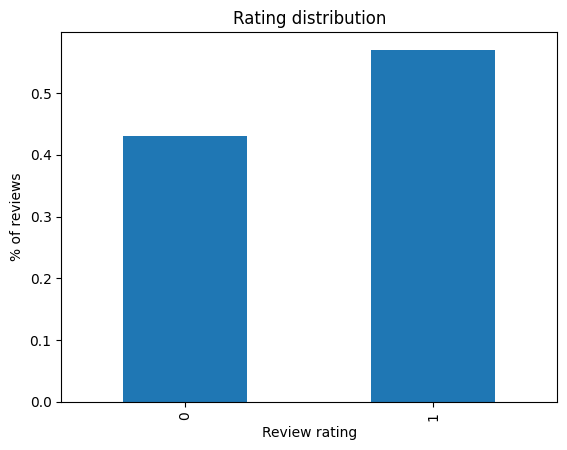

In [17]:
# seeing the value count of positive and negative reviews
df['Reviewer_Score'].value_counts(normalize=True).sort_index().plot(
    kind="bar",
    xlabel="Review rating",
    ylabel="% of reviews",
    title="Rating distribution"
)
plt.show()

In [18]:
df['Reviewer_Score'].value_counts(normalize=True).sort_index()

Reviewer_Score
0    0.4299
1    0.5701
Name: proportion, dtype: float64

The above graph illustrates the distribution of review sentiments in our dataset, revealing a slight class imbalance between positive and negative reviews. Specifically:

- Negative reviews (Class 0): 42.99% of the dataset

- Positive reviews (Class 1): 57.01% of the dataset

This distribution provides several key insights:

1. **Slight Imbalance**: While there is a noticeable difference between the two classes, with positive reviews being more prevalent, the imbalance is not severe. The ratio between the majority and minority class is approximately 1.33:1, which is generally considered a mild imbalance.

2. **Modeling Implications**: This level of imbalance is unlikely to significantly impact our modeling efforts. Most machine learning algorithms can handle this degree of imbalance without requiring extensive balancing techniques.

3. **Evaluation Considerations**: Despite the mild nature of the imbalance, it's crucial to use appropriate evaluation metrics. Accuracy alone may not be sufficient; we should consider metrics such as F1-score, precision, recall, and ROC-AUC to get a comprehensive view of model performance.

<a id="corr"></a>
### Correlation Matrix and Heatmap

In [19]:
# Selecting only numeric columns (float and integer)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

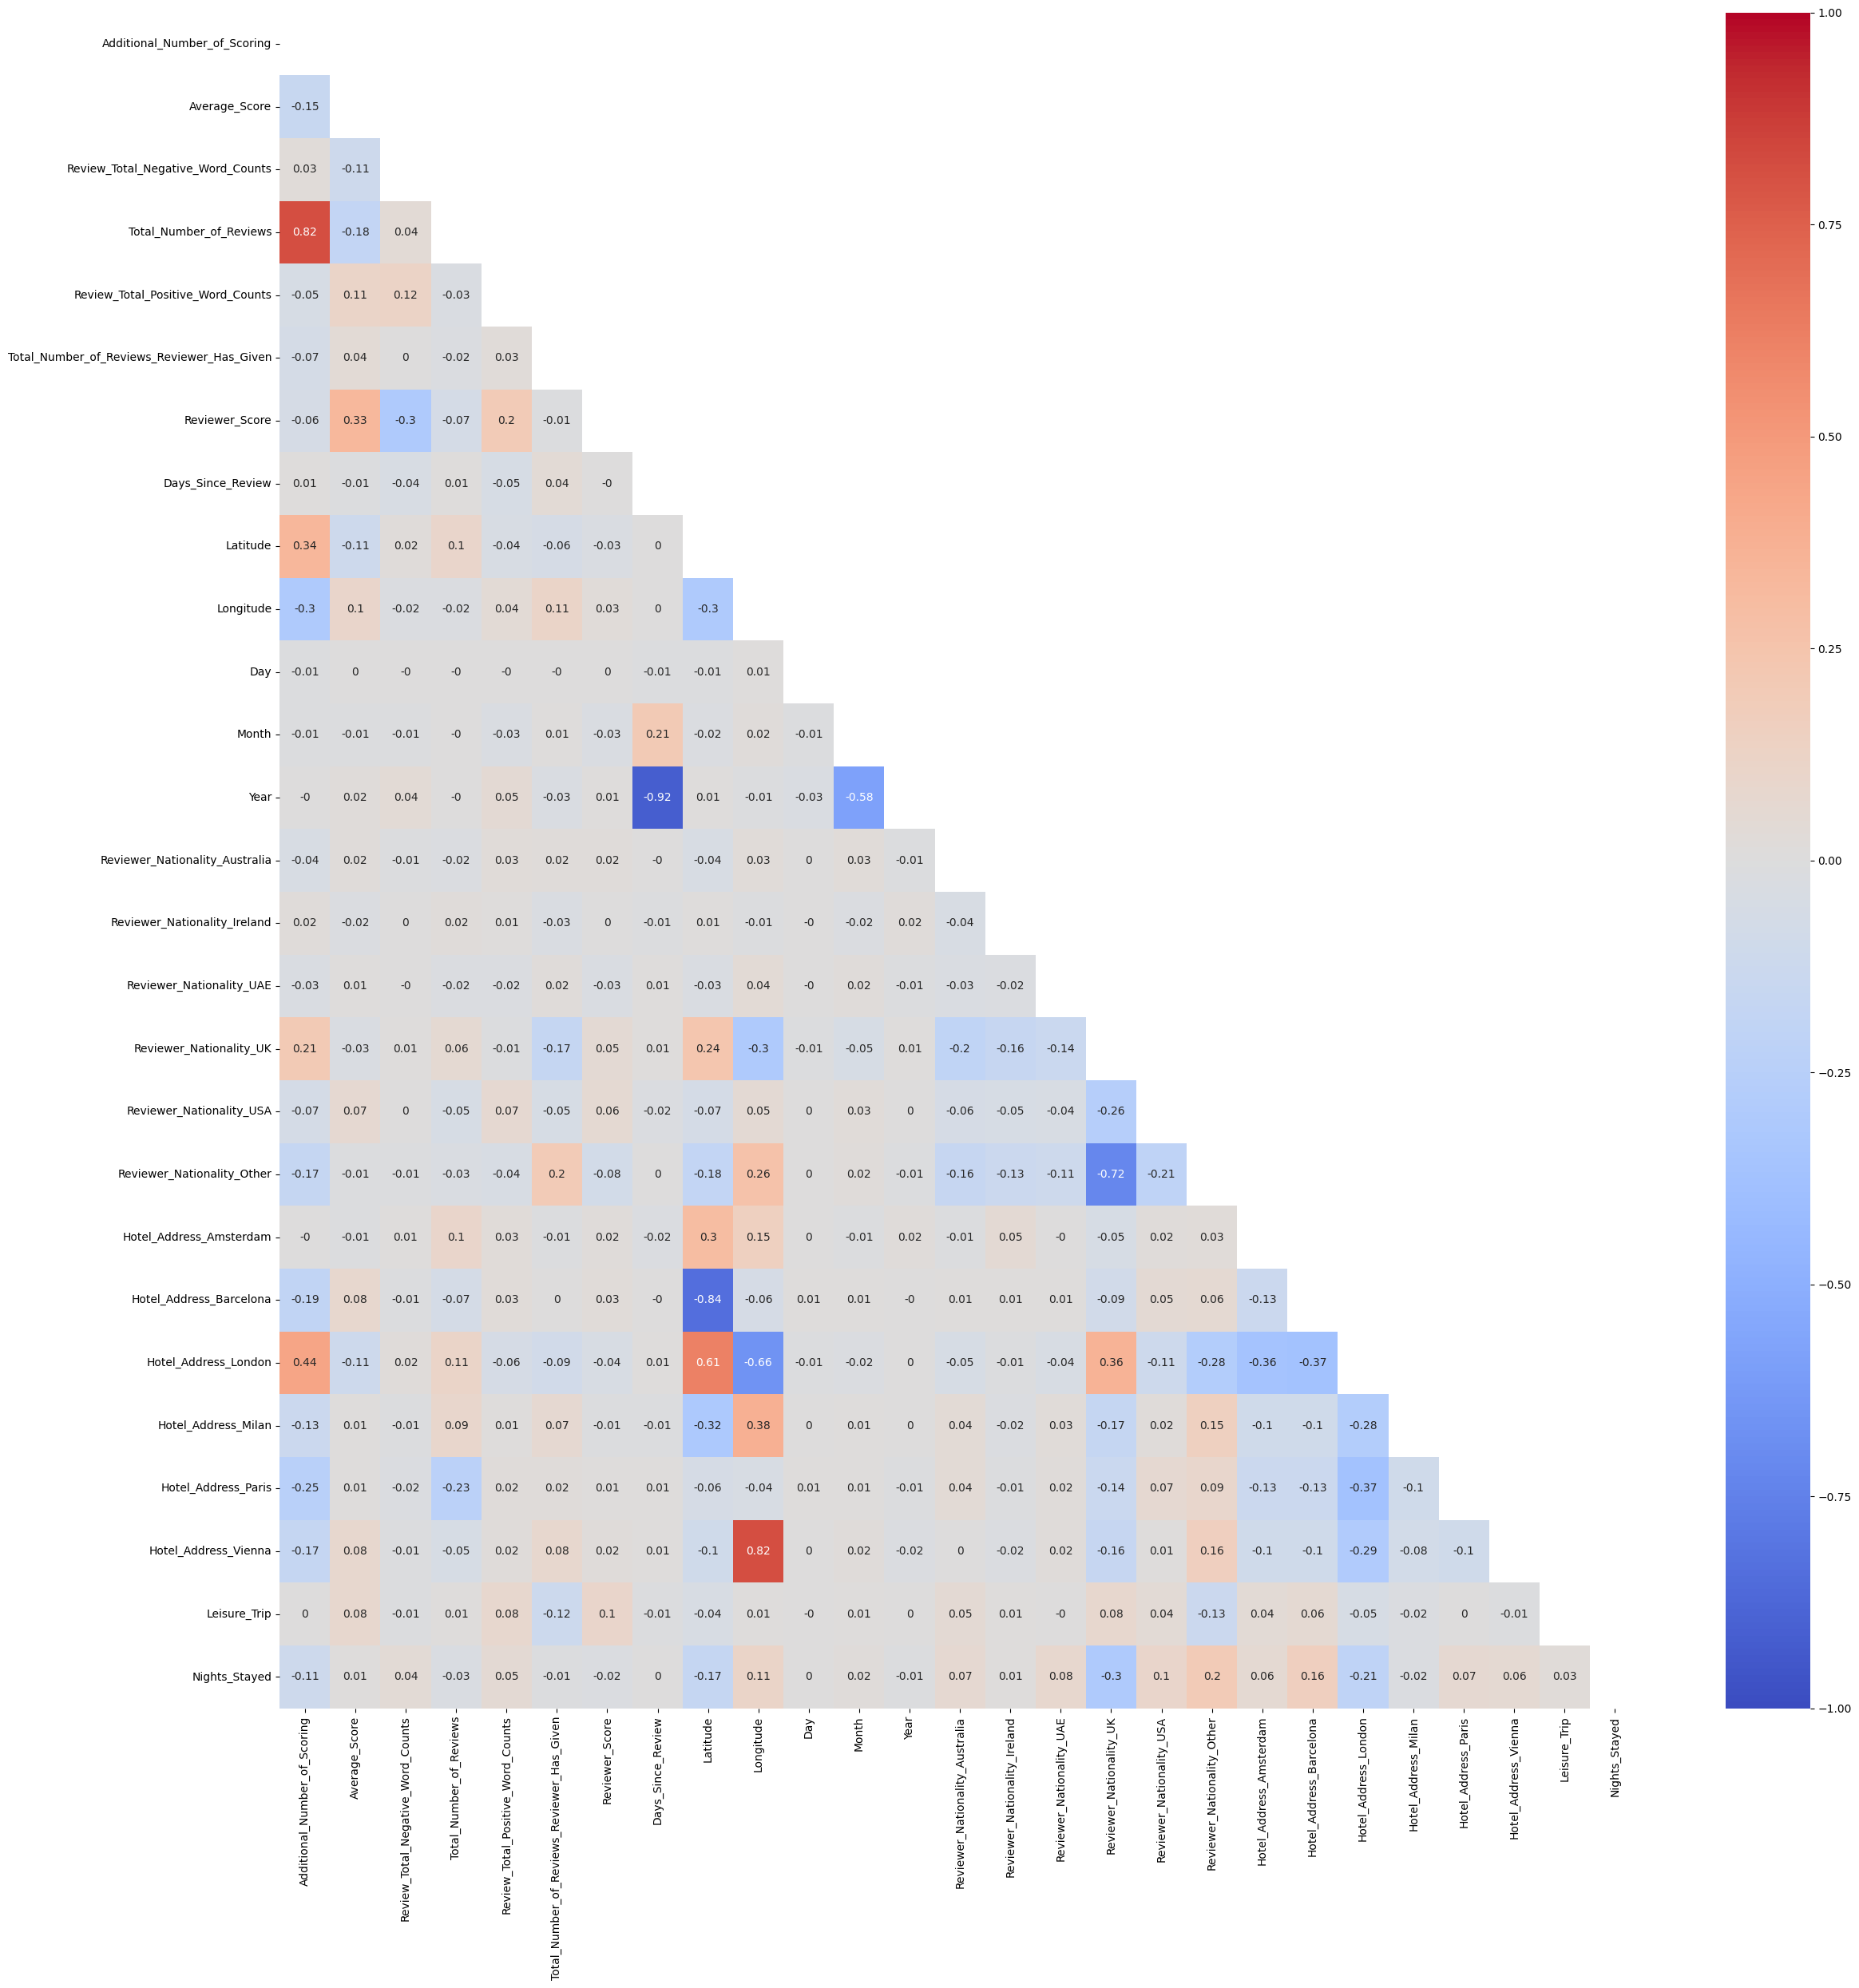

In [20]:
# Creating a mask that retains only the upper triangular portion of a correlation matrix,
mask = np.triu(correlation_matrix)

# Plotting heatmap
plt.figure(figsize=(25, 25), dpi=100)
sns.heatmap(correlation_matrix.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', 
            mask=mask, annot_kws={'size': 10})
plt.tight_layout()
plt.show()

**Correlation Heatmap Analysis**  
The correlation matrix reveals several critical patterns between the target variable (`Reviewer_Score`) and other features:  

1. **Strongest Relationships**:  
   - **Average_Score**: Shows a moderate positive correlation (`0.33`) with `Reviewer_Score`, suggesting hotels with higher average ratings tend to receive better individual scores.  
   - **Negative Word Counts**: Exhibits a notable negative correlation (`-0.30`), implying reviews with more negative words correlate with lower scores.  

2. **Textual Features**:  
   - **Positive Word Counts**: Weak positive correlation (`0.20`), indicating reviews with more positive words slightly align with higher scores.  
   - **Negative vs. Positive**: The stronger anti-correlation of negative word counts compared to positive ones highlights that negative language has a more pronounced impact on scores.  

3. **Geographical and Metadata Features**:  
   - Hotel locations (e.g., `Hotel_Address_London`, `Hotel_Address_Paris`) show negligible correlations, suggesting location alone is not a strong predictor of scores.  
   - `Leisure_Trip` has a weak positive link (`0.10`), while `Nights_Stayed` and reviewer nationality features show minimal relevance.  

4. **Unexpected Insights**:  
   - `Total_Number_of_Reviews` and `Days_Since_Review` have near-zero correlations with the target, indicating temporal factors or review volume may not influence scores significantly.  
   - High multicollinearity exists between `Additional_Number_of_Scoring` and `Total_Number_of_Reviews` (`0.82`), suggesting redundancy between these features.  

**Implications for the NLP Project**:  
While metadata features show limited predictive power, text-based features (positive/negative word counts) and `Average_Score` are critical drivers. This reinforces the need for robust text preprocessing and sentiment analysis in modeling. The weak correlations for most non-text features suggest the model will rely heavily on NLP techniques rather than tabular metadata.  

<a id="dist"></a>
### Distribution of Average Score

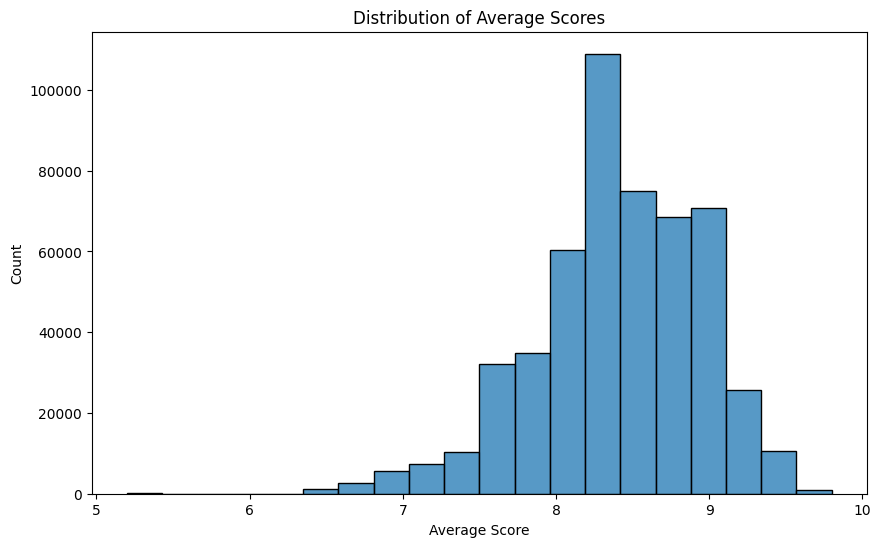

In [21]:
# plotting a distribution of avergae score graph 
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Average_Score', kde=False, bins=20, stat='count')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()

The histogram above illustrates the distribution of average scores in the dataset, revealing several important observations:

- **Positive Skew**: The distribution is skewed towards higher average scores, indicating that most hotels tend to receive favorable ratings overall.

- **Peak at 8.25**: The highest frequency of average scores is observed around 8.25, suggesting that this is a common rating for hotels in the dataset.

- **Gradual Decline**: After the peak, there is a gradual reduction in frequency as average scores approach the upper limit, showing that fewer hotels achieve near-perfect ratings.

- **Minimum Threshold at 5**: The histogram starts at an average score of 5, with no occurrences below this value. This implies that hotels with extremely low ratings are either rare or excluded from the dataset.

- **Significant Drop at 9 and Above**: While higher average scores are common, there is a noticeable decline in frequency for scores of 9 and above, indicating that achieving exceptionally high ratings is relatively rare.

- **Overall Positive Trend**: The concentration of average scores between 7 and 9 reflects a generally positive sentiment among reviewers, with most hotels being rated as "good" or "very good."

This analysis highlights that the dataset primarily consists of hotels with relatively high average scores, which aligns with a generally positive customer sentiment.

<a id="time"></a>
### Average Score Over Time

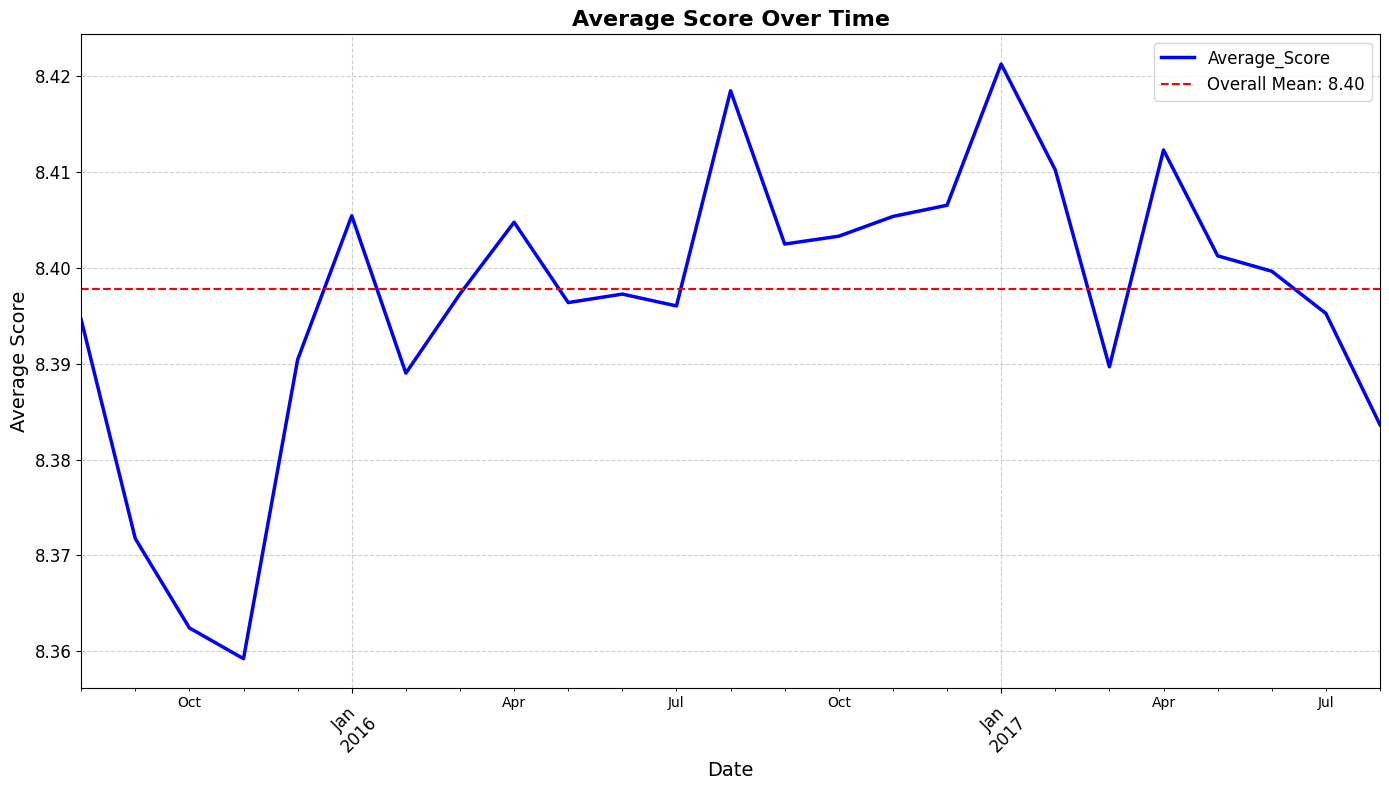

In [22]:
# Creating a temporary DataFrame for plotting
temp_df = df.copy()  

# Converting to datetime and set the index on the temporary DataFrame
temp_df['Date'] = pd.to_datetime(temp_df[['Year', 'Month', 'Day']])
temp_df.set_index('Date', inplace=True)

# Resampling and plot
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
temp_df['Average_Score'].resample('M').mean().plot(color='blue', linewidth=2.5)

# Adding a title and axis labels
plt.title('Average Score Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

# Adding gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Customizing x-axis ticks for better formatting
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Adding a horizontal line to indicate the overall mean (optional)
overall_mean = df['Average_Score'].mean()
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Adding a legend
plt.legend(fontsize=12)

# Showing the plot
plt.tight_layout()  
plt.show()

The graph shows the **monthly trend of average scores** over time for hotel reviews, with the following key observations:

1. **Overall Stability**:  
   - The average scores fluctuate slightly but remain relatively stable around the **overall mean of 8.40** (indicated by the red dashed line).  

2. **Seasonal Variations**:  
   - There are noticeable peaks and dips in the average scores, suggesting potential seasonal or periodic trends in customer satisfaction.  
   - For example, a sharp drop is observed around late 2015, followed by a steady recovery into mid-2016.

3. **General Trend**:  
   - The scores show no significant upward or downward trend over time, indicating consistent hotel performance during this period.

4. **Lower Bound**:  
   - The lowest average score is slightly below **8.36**, while the highest peaks reach just above **8.42**, showing a narrow range of variation.

5. **Insights for NLP Analysis**:  
   - The stability in average scores suggests that most reviews are generally positive.
   - Fluctuations could be linked to external factors (e.g., seasonality, special events), which may influence customer sentiment and review content.

This analysis highlights the importance of understanding temporal patterns in customer reviews and how they might relate to textual features (e.g., sentiment in positive/negative reviews) for an NLP-based project.

<a id="nationality"></a>
### Reviews by Nationality 

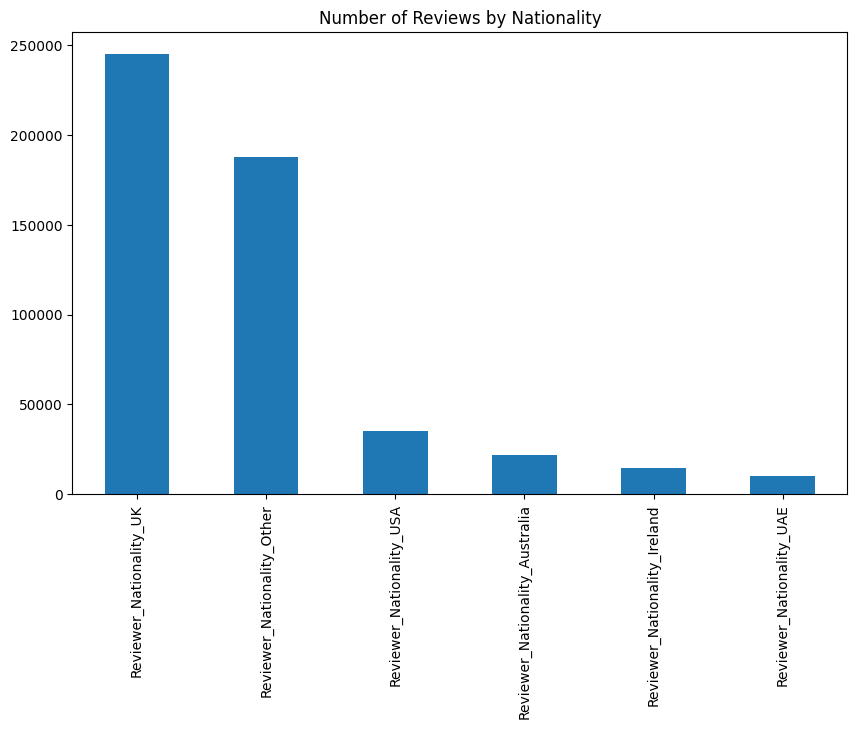

In [23]:
# ploting a frequencu graph for nationality
nationality_cols = [col for col in df.columns if col.startswith('Reviewer_Nationality_')]
nationality_data = df[nationality_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
nationality_data.plot(kind='bar')
plt.title('Number of Reviews by Nationality')
plt.show()

The graph shows the distribution of reviewers based on their nationality. The key observations are as follows:

1. **Top Nationality**:  
   - Reviewers from the **UK** form the largest group, with **245,107 reviews**, making up a significant portion of the dataset.

2. **Second Largest Group**:  
   - Reviewers categorized as **"Other"** (likely representing nationalities not explicitly listed) account for **188,053 reviews**, the second-largest group.

3. **Other Notable Nationalities**:  
   - **USA**: 35,349 reviews  
   - **Australia**: 21,648 reviews  
   - **Ireland**: 14,814 reviews  
   - **UAE**: 10,228 reviews  

4. **Insights for Analysis**:  
   - The dominance of UK reviewers suggests that the dataset may be skewed towards reviews from this region.  
   - The "Other" category represents a diverse group of reviewers, which could be explored further to identify patterns or trends.  

This distribution highlights the importance of considering reviewer nationality when analyzing trends or building models, as it may influence review content and sentiment.

<a id="text"></a>
## Text Precrocessing
[Back to Table of Contents](#table-of-content)

Text processing in NLP is the preparation of raw text data for analysis by transforming it into a format that machines can more easily understand and interpret. It is a crucial step in Natural Language Processing that involves several techniques:

- **Tokenization**: Breaking down text into smaller units like words or sentences.

- **Lowercasing**: Converting all characters to lowercase to standardize the text.

- **Stop word removal**: Filtering out common words that don't add significant meaning.

- **Stemming or lemmatization**: Reducing words to their root form.

- **Text cleaning**: Removing punctuation, special characters, and numbers.

Text processing is important for several reasons:

- Improves efficiency and accuracy of machine learning models.

- Removes noise and unhelpful data from the text.

- Standardizes text for consistent analysis.

- Reduces the complexity of the data, making it easier for algorithms to process.

- Enables the extraction of meaningful information from large volumes of unstructured text data.

In [24]:
# creating the x and y variable in our dataset
y = df['Reviewer_Score']
X = df[[col for col in df.columns if col not in ['Reviewer_Score']]]

In [25]:
# splitting our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"y_train has {y_train.shape[0]} rows")
print(f"y_test has {y_test.shape[0]} rows")

X_train has 412159 rows and 28 columns
X_test has 103040 rows and 28 columns
y_train has 412159 rows
y_test has 103040 rows


**Custom Text Preprocessing Pipeline**  

At the start of our notebpok, we defined a `custom_vectorizer` function to standardize and clean raw text data before converting it into numerical features. This function performs three critical preprocessing steps: (1) **removes irrelavant characters** (e.g., ``), (2) **converts all text to lowercase** to ensure uniformity, and (3) **removes stopwords** (common words like "the" or "and") while retaining only alphabetic tokens. For both positive and negative review columns, this function breaks down each cleaned review into individual tokens (words), creating a refined vocabulary that eliminates noise and focuses on meaningful terms. By applying this preprocessing, we ensure that the subsequent vectorization step (e.g., using `CountVectorizer`) generates high-quality numerical representations of the text data, which are essential for training an accurate model to predict `Reviewer_Score`.

In [27]:
# Initializing CountVectorizer with custom tokenizer
vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
    max_features=500,
    min_df=10,
    token_pattern=None
)

The CountVectorizer class comes with additional methods that help further clean and refine the data. In this implementation, we have added a few more parameters to enhance its functionality:

1. We set the **tokenizer to our custom tokenizer**, allowing us to clean the textual data according to our specific preferences.

2. We've set the **max_features parameter to 500**, meaning only the 500 most unique words/tokens will be used, and the rest will be dropped. This helps focus on the most relevant vocabulary.

3. We've ensured that words occurring less than 10 times in any document are dropped by **using the min_df parameter**. This helps eliminate rare or potentially irrelevant terms.

4. For the token_pattern, we've set it to None since we're already using our custom tokenizer, which handles the tokenization process.

These adjustments allow for more precise control over the text preprocessing and feature extraction, tailoring the vectorization process to our specific needs and potentially improving the quality of our text analysis or machine learning model.

<a id="process"></a>
### Processing Positive and Negative Reviews

Let's process the positive and negative reviews separately and then combine them into a single file containing only numerical data. For the CountVectorizer, we've added additional parameters to limit the features (tokens) to 500, addressing potential dimensionality issues and reducing processing time. We've also removed words that occur less than 10 times in our dataset to focus on the most frequent words. We'll begin by processing the positive reviews, applying these constraints to ensure a more efficient and focused analysis of our sentiment data.

In [28]:
# Processing positive reviews
vectorizer_pos = CountVectorizer(
    tokenizer=custom_tokenizer,
    max_features=500,
    min_df=10,
    token_pattern=None
)

pos_train_vectors = vectorizer_pos.fit_transform(X_train['Positive_Review'])
pos_test_vectors = vectorizer_pos.transform(X_test['Positive_Review'])

In [29]:
print(f"pos_train has {pos_train_vectors.shape[0]} rows and {pos_train_vectors.shape[1]} columns")
print(f"pos_test has {pos_test_vectors.shape[0]} rows and {pos_test_vectors.shape[1]} columns")

pos_train has 412159 rows and 500 columns
pos_test has 103040 rows and 500 columns


We can see that the sparse matrix has 41,2159 rows and 500 columns (as we add the max limit of 500). This means that there are 500 unique terms or tokens extracted as the vocabulary.

In [30]:
# Seeing the tokens for the positive reviews 
print("Positive review tokens:")
print(vectorizer_pos.get_feature_names_out()[:10])

Positive review tokens:
['able' 'absolutely' 'access' 'accommodating' 'afternoon' 'air' 'airport'
 'albert' 'amazing' 'ambience']


In [31]:
# Creating DataFrames with prefixed column names
pos_train_df = pd.DataFrame.sparse.from_spmatrix(pos_train_vectors, columns=['pos_' + f for f in 
                                                                             vectorizer_pos.get_feature_names_out()])
pos_test_df = pd.DataFrame.sparse.from_spmatrix(pos_test_vectors, columns=['pos_' + f for f in 
                                                                           vectorizer_pos.get_feature_names_out()])

In [32]:
# looking at the top 5 rows of the pos_train df 
pos_train_df.head()

,pos_able,pos_absolutely,pos_access,pos_accommodating,pos_afternoon,pos_air,pos_airport,pos_albert,pos_amazing,pos_ambience,...,pos_window,pos_windows,pos_wine,pos_wonderful,pos_work,pos_worked,pos_working,pos_worth,pos_year,pos_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have successfully transformed the positive reviews column into a tokenized format. In this new representation, each row corresponds to a unique document or review, while the columns represent the **500 most significant unique words or tokens**. The data within the dataframe now reflects the frequency of occurrence for each of these tokens within their respective documents. This transformation allows us to **quantify the textual data, converting the qualitative reviews into a numerical format that's more suitable for machine learning algorithms.** By limiting our feature set to 500 tokens and focusing on the most frequent words, we've struck a balance between maintaining important information and managing the dimensionality of our dataset, which will facilitate more efficient and effective analysis in subsequent steps of our project.

Now let's do the same thing for negative reviews

In [33]:
# Processing negative reviews
vectorizer_neg = CountVectorizer(
    tokenizer=custom_tokenizer,
    max_features=500,
    min_df=10,
    token_pattern=None
)

neg_train_vectors = vectorizer_neg.fit_transform(X_train['Negative_Review'])
neg_test_vectors = vectorizer_neg.transform(X_test['Negative_Review'])

In [34]:
neg_train_vectors

<412159x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2041417 stored elements in Compressed Sparse Row format>

In [35]:
print(f"neg_train has {neg_train_vectors.shape[0]} rows and {neg_train_vectors.shape[1]} columns")
print(f"neg_test has {neg_test_vectors.shape[0]} rows and {neg_test_vectors.shape[1]} columns")

neg_train has 412159 rows and 500 columns
neg_test has 103040 rows and 500 columns


We have the same number of rows and columns as before as we used the same dataset and the same parameters 

In [36]:
# Seeing the tokens for the negative reviews 
print("\nNegative review tokens:")
print(vectorizer_neg.get_feature_names_out()[:10])


Negative review tokens:
['able' 'absolutely' 'ac' 'access' 'actually' 'air' 'airport' 'alarm'
 'annoying' 'apart']


In [37]:
# Creating DataFrames with prefixed column names
neg_train_df = pd.DataFrame.sparse.from_spmatrix(neg_train_vectors, columns=['neg_' + f for f in 
                                                                             vectorizer_neg.get_feature_names_out()])
neg_test_df = pd.DataFrame.sparse.from_spmatrix(neg_test_vectors, columns=['neg_' + f for f in 
                                                                           vectorizer_neg.get_feature_names_out()])

In [38]:
# looking at the first 5 rows of the neg_train df 
neg_train_df.head()

,neg_able,neg_absolutely,neg_ac,neg_access,neg_actually,neg_air,neg_airport,neg_alarm,neg_annoying,neg_apart,...,neg_windows,neg_work,neg_worked,neg_working,neg_works,neg_worn,neg_worst,neg_worth,neg_wouldn,neg_wrong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's do a quick plot to see what the top 20 most frequenct words are for both the psotive and negative review dataframe

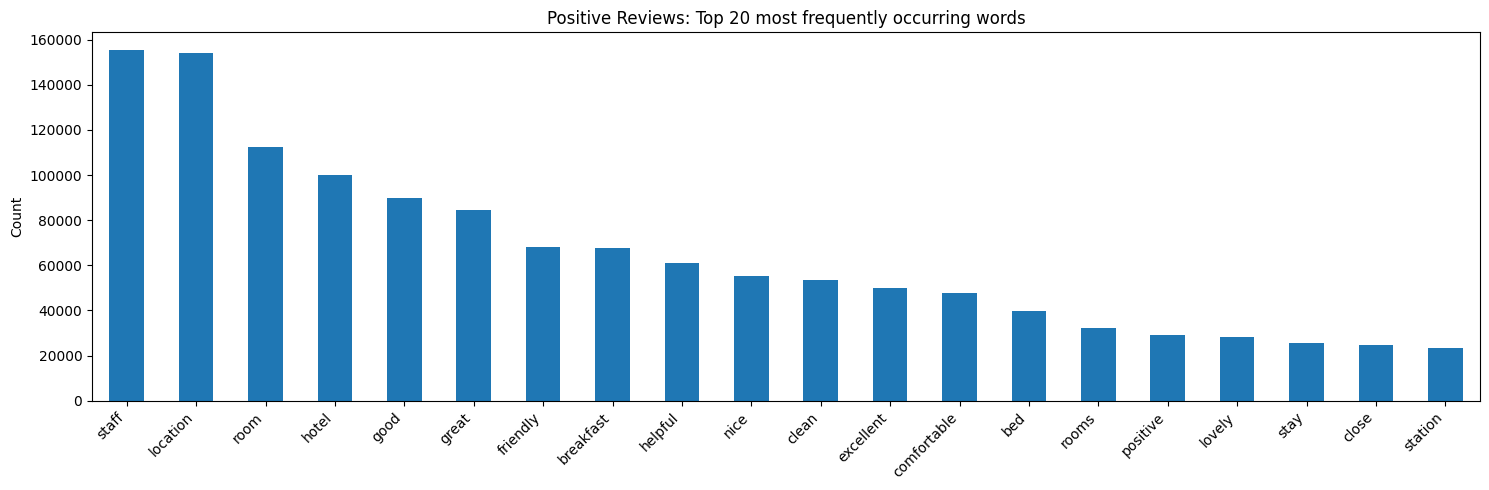

In [39]:
def plot_top_words(vectorizer, vectors, title_prefix, n=20):
    # Convert to a series to re-attach the tokens themselves as the index
    word_counts = pd.Series(vectors.sum(axis=0).A1,
                            index=vectorizer.get_feature_names_out())
    word_counts = word_counts.sort_values(ascending=False)  # sorts from high-to-low

    # Plotting 
    plt.figure(figsize=(15, 5))
    word_counts.head(n).plot(kind="bar", legend=False)
    plt.title(f"{title_prefix} Top {n} most frequently occurring words")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# For positive reviews
plot_top_words(vectorizer_pos, pos_train_vectors, "Positive Reviews:")

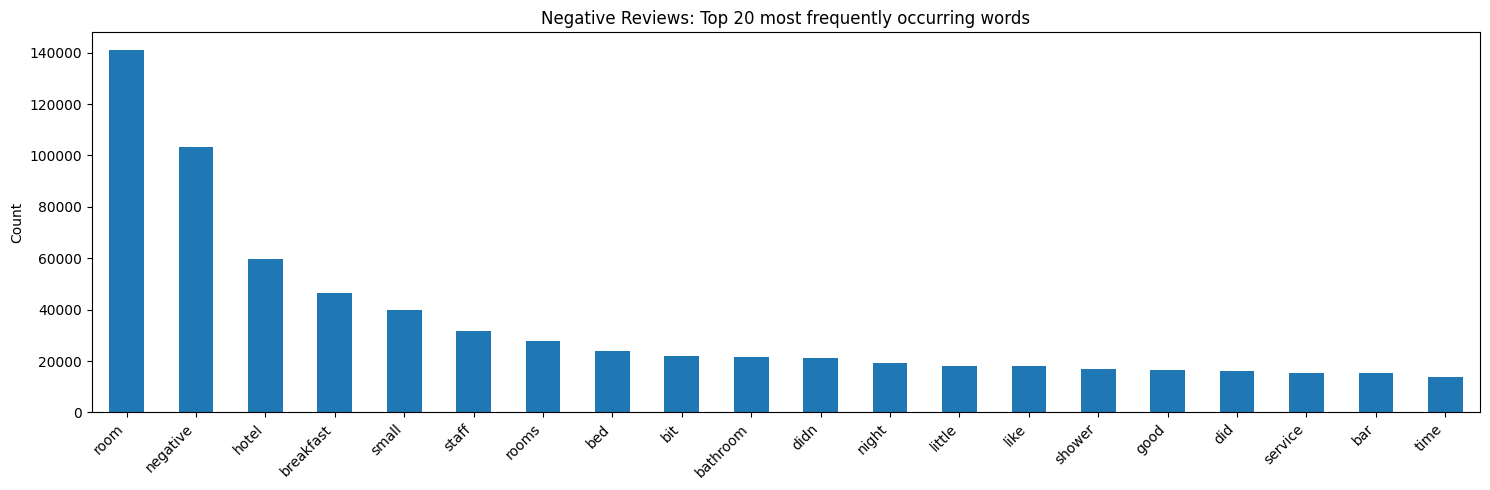

In [40]:
# For negative reviews
plot_top_words(vectorizer_neg, neg_train_vectors, "Negative Reviews:")

### Comparative Analysis of Top Words in Positive and Negative Reviews

The visualization of the top 20 words for positive and negative reviews reveals distinct patterns in customer sentiment:

#### Positive Reviews:
- **Overwhelmingly Positive Language**: Words like "good," "great," "helpful," and "excellent" dominate the frequency chart. These unambiguously positive terms appear consistently across numerous reviews, indicating a clear trend of satisfaction.
- **Standalone Clarity**: These positive descriptors are self-explanatory and convey a positive experience even without additional context, making it easier to identify satisfied customers from isolated words.

#### Negative Reviews:
- **Mixed Terminology**: While some clearly negative words like "small" appear frequently, many top words (e.g., "breakfast," "hotel") are context-dependent and not inherently negative.
- **Need for Context**: Unlike the positive reviews, many frequent words in negative reviews require additional context to understand the nature of the complaint. For instance, "breakfast" could be criticized for quality, variety, or timing, but this isn't clear from the word alone.

#### Key Insights:
1. **Sentiment Clarity**: Positive reviews tend to use more universally positive language, making sentiment easier to detect from individual words.
2. **Context Dependency**: Negative reviews often focus on specific aspects of the experience, necessitating more contextual analysis to fully understand the complaints.
3. **Potential for Targeted Improvements**: The frequency of neutral words like "breakfast" in negative reviews could highlight areas for potential service improvements.

This analysis underscores the importance of considering both word frequency and contextual usage in sentiment analysis, especially for negative reviews where the reasons for dissatisfaction may be more nuanced and varied.

<a id="combine"></a>
### Combining Datasets 

In [41]:
# Dropping teh text columns for x train and test 
X_train = X_train.drop(columns=['Positive_Review', 'Negative_Review'])
X_test = X_test.drop(columns=['Positive_Review', 'Negative_Review'])

In [42]:
# concatanating the neg, pos and the rest of the columns to come up with one df 
X_train = pd.concat([X_train.reset_index(drop=True), 
                     neg_train_df.reset_index(drop=True), 
                     pos_train_df.reset_index(drop=True)], axis=1)
X_train = X_train.drop('index', axis=1, errors='ignore')

In [43]:
# concatanating the neg, pos and the rest of the columns to come up with one df 
X_test = pd.concat([X_test.reset_index(drop=True), 
                     neg_test_df.reset_index(drop=True), 
                     pos_test_df.reset_index(drop=True)], axis=1)
X_test = X_test.drop('index', axis=1, errors='ignore')

In [44]:
# looking at the top 5 rows 
X_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,...,pos_window,pos_windows,pos_wine,pos_wonderful,pos_work,pos_worked,pos_working,pos_worth,pos_year,pos_young
0,834,9.1,0,4687,19,6,227,52.370545,4.888644,19,...,0,0,0,0,0,0,0,0,0,0
1,18,8.5,7,217,5,1,672,48.230701,16.355219,1,...,0,0,0,0,0,0,0,0,0,0
2,10,8.6,16,189,5,4,18,45.482879,9.186346,16,...,0,0,0,0,0,0,0,0,0,0
3,305,8.3,11,1719,52,8,170,51.491571,-0.196319,14,...,0,0,0,0,0,0,0,0,0,0
4,169,8.3,9,2573,17,20,684,41.408205,2.212463,19,...,0,0,0,0,0,0,0,0,0,0


In [45]:
print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"y_train has {y_train.shape[0]} rows")
print(f"y_test has {y_test.shape[0]} rows")

X_train has 412159 rows and 1026 columns
X_test has 103040 rows and 1026 columns
y_train has 412159 rows
y_test has 103040 rows


In [46]:
# # sanity check 
# X_train.isnull().sum()

Now that we have our final X_train and X_test dataset and that all of our data is in numercical format, we can start out modelling process

<a id="log"></a>
## Logistic Regression
[Back to Table of Contents](#table-of-content)

<a id="one"></a>
### Logistic Regression - All features 

Let's first fit a logistics regression as out baselien model with all the features and see hwo the model performs. We can then iterate through our model as nessecary to improve the model's performance. 

In [47]:
# Let's first scale our data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

For the above we are using a the standard scaler class to standardize all the columsn so we have an apples to apples comparison

In [48]:
# Fitting a logestic regression model 
logreg = LogisticRegression(C=0.5, max_iter=1000, random_state=40)
logreg.fit(X_train_scaled, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_scaled, y_train)}")
print(f"Test score: {logreg.score(X_test_scaled, y_test)}")

Train score: 0.7903236372370857
Test score: 0.7894215838509316


Here we have fit a logistic regression to our dataset which includes all the features, we can see that the accruarry for our model is pretty good, with 79.04% acctuary on the train test and 78.95% on the test set. Let's take a depper look into our features to see which festures are contributing to the target and which features are not.

In [49]:
# Converting back to DataFrame with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [50]:
# extracting the coeffeients, the feature names and then creating a dataframe for it 
coefficients = logreg.coef_[0]
feature_names = X_train_scaled.columns
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

In [51]:
# taking the abs value of the coeffeintd as a new column and the sorting by highest to lowest 
coef_df['abs_coefficient'] = abs(coef_df['coefficient'])
coef_df_sorted = coef_df.sort_values('abs_coefficient', ascending=False)

In [52]:
# taking the top 20 features 
top_n = 20
top_features = coef_df_sorted.head(top_n)

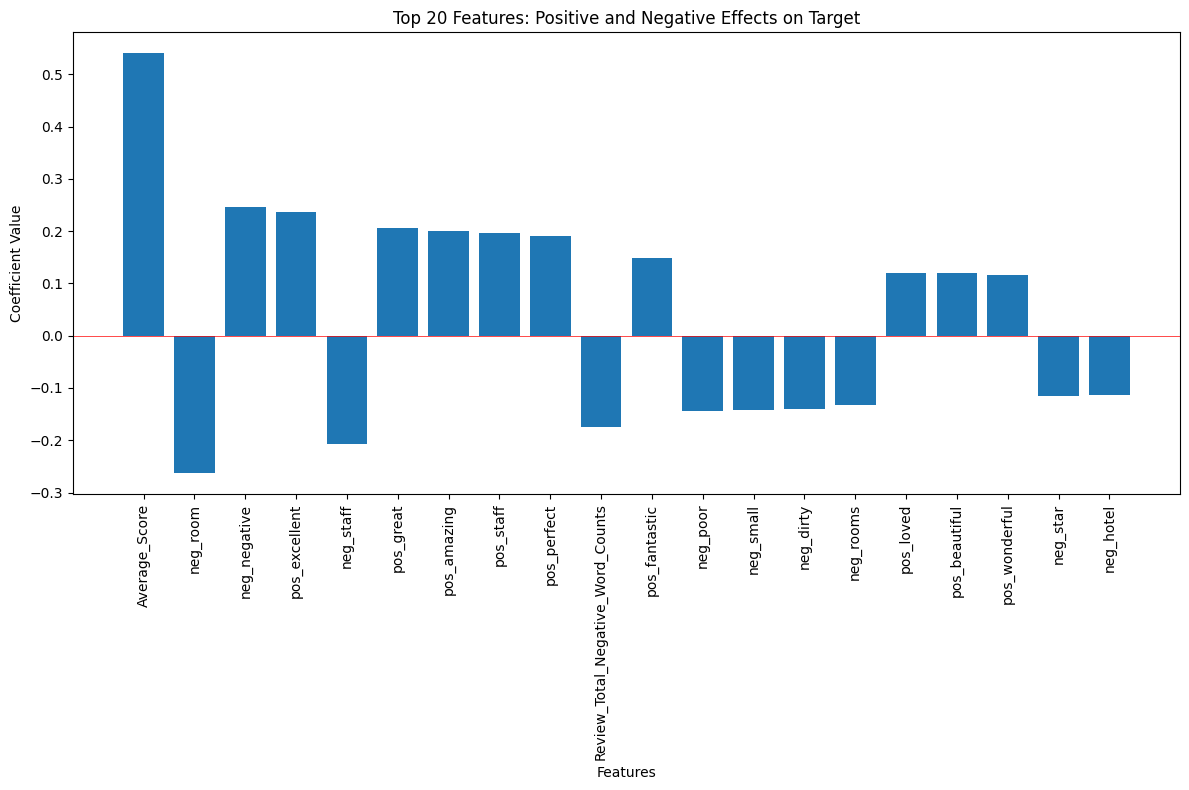

In [53]:
# creating a plot of the top 20 features that either negatively or positively affect the target 
plt.figure(figsize=(12, 8))
plt.bar(top_features['feature'], top_features['coefficient'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title(f'Top {top_n} Features: Positive and Negative Effects on Target')
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

The top 20 features influencing hotel review scores highlight notable trends:

*   **Negative Impact:** The model indicates that several factors contribute to lower review scores. These include:
    *   Negative sentiment words (`neg_negative`)
    *   Words related to cleanliness and size issues (`neg_dirty`, `neg_small`)
    *   Review total negative word count
    *   Rooms being considered poor
    *   Rooms in general

*   **Positive Impact:** Higher review scores tend to be associated with:
    *   The hotel's average score.
    *   Positive sentiment words such as `pos_excellent`, `pos_amazing`, `pos_great`, `pos_perfect`, `pos_fantastic`
    *   Words indicating guest affection such as `pos_loved`
    *   Words used to describe beauty such as `pos_beautiful` and `pos_wonderful`
    *   A high start rating for a hotel

*   **Broader Observations:** The longitude and latitude's relationships to review scores from the correlation matrix might indicate location-specific effects. For example, the model may be overemphasizing the role of latitude in London, a major tourist hub. A more nuanced analysis might reveal that city-specific characteristics, not just latitude, are driving score variations. Similarly, Vienna's geography or qualities could influence the ratings.

In [54]:
# creating variables for neg and postive coefficients 
positive_coef = coef_df[coef_df['coefficient'] > 0].sort_values('coefficient', ascending=False).head(10)
negative_coef = coef_df[coef_df['coefficient'] < 0].sort_values('coefficient', ascending=True).head(10)

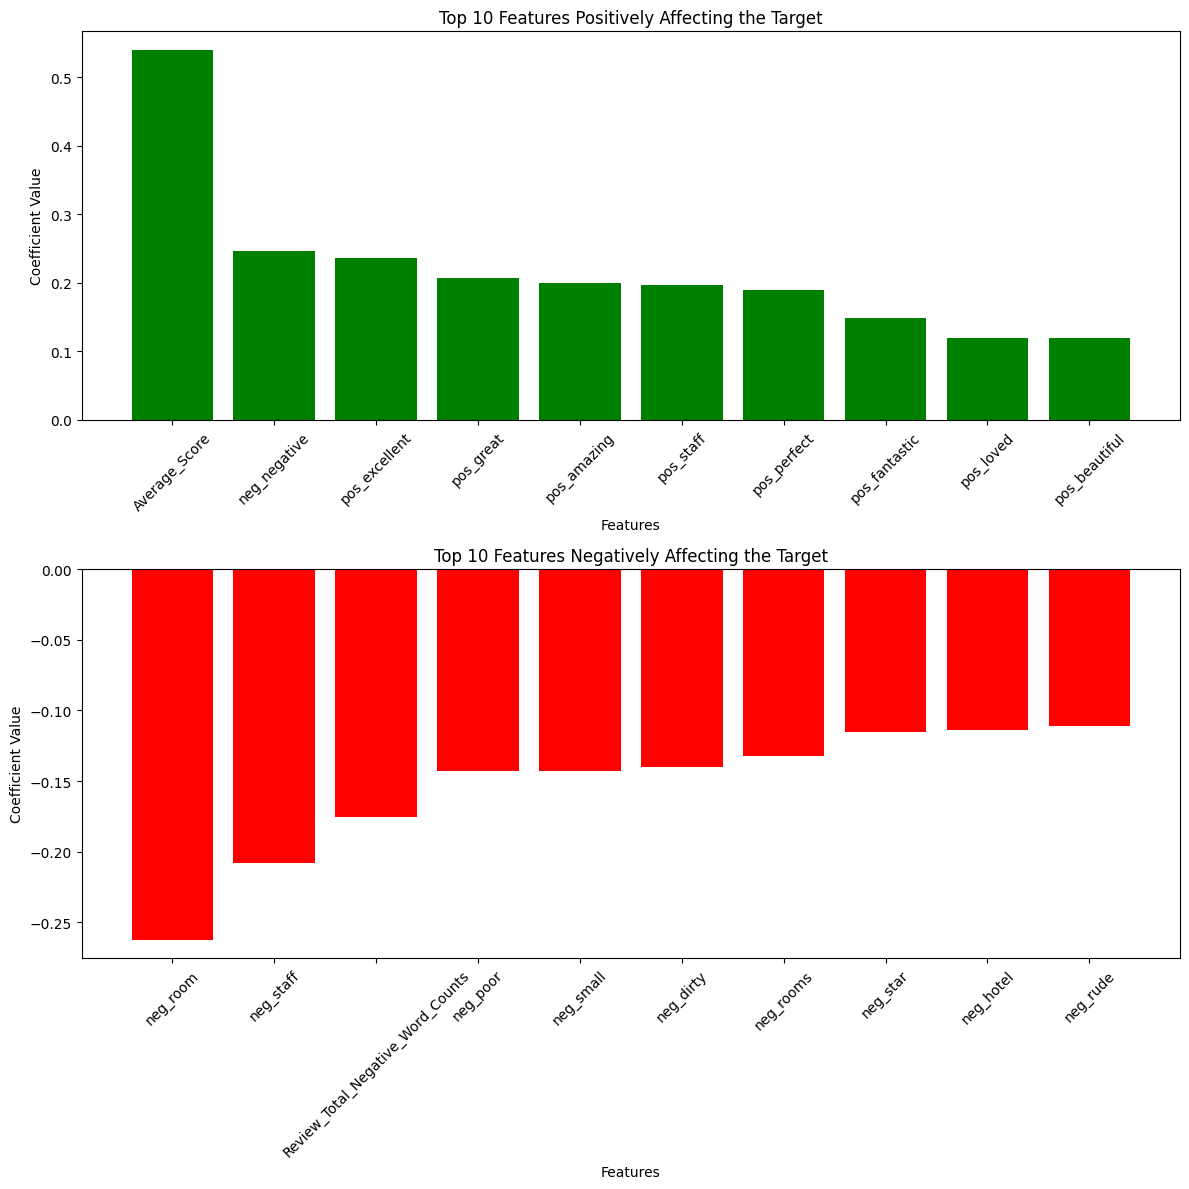

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Positive coefficients plot
ax1.bar(positive_coef['feature'], positive_coef['coefficient'], color='green')
ax1.set_title('Top 10 Features Positively Affecting the Target')
ax1.set_xlabel('Features')
ax1.set_ylabel('Coefficient Value')
ax1.tick_params(axis='x', rotation=45)

# Negative coefficients plot
ax2.bar(negative_coef['feature'], negative_coef['coefficient'], color='red')
ax2.set_title('Top 10 Features Negatively Affecting the Target')
ax2.set_xlabel('Features')
ax2.set_ylabel('Coefficient Value')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The breakdown of features with positive and negative coefficients provides deeper insights into factors influencing hotel review scores. We observe consistent patterns with our previous analysis, notably:

**Negative effects**:
- Negative sentiment words (`neg_negative`)
- Words related to cleanliness and size issues (`neg_dirty`, `neg_small`)
- Review total negative word count
- Rooms being considered poor

**Positive effects**:
- The hotel's average score.
- Positive sentiment words such as `pos_excellent`, `pos_amazing`, `pos_great`, `pos_perfect`, `pos_fantastic`
- Words indicating guest affection such as `pos_loved`
- Words used to describe beauty such as `pos_beautiful` and `pos_wonderful`

The persistence of these patterns reinforces our earlier observations. However, we must also keep in mind some other factors which might potential issues:

1. **Multicollinearity**: "Days since review" and "Year" likely exhibit high correlation, potentially inflating their apparent importance.

2. **Geographic misattribution**: The model may be incorrectly attributing city-specific factors to latitude and longitude. For instance, Vienna's high ratings might be mistakenly associated with its latitude rather than its unique characteristics as a tourist destination.

3. **Sentiment analysis anomaly**: Surprisingly, "neg_negative" shows a positive coefficient, suggesting it positively affects review scores. This counterintuitive result warrants further investigation. Possible explanations include:
   - Context-dependent usage (e.g., "not negative")
   - Sarcasm or irony in reviews
   - Data processing errors

To address these issues and improve model reliability, we can consider:
- Addressing multicollinearity through feature selection or dimensionality reduction
- Incorporating more city-specific features to reduce geographic misattribution
- Reviewing the sentiment analysis process, particularly for anomalous results like "neg_negative"

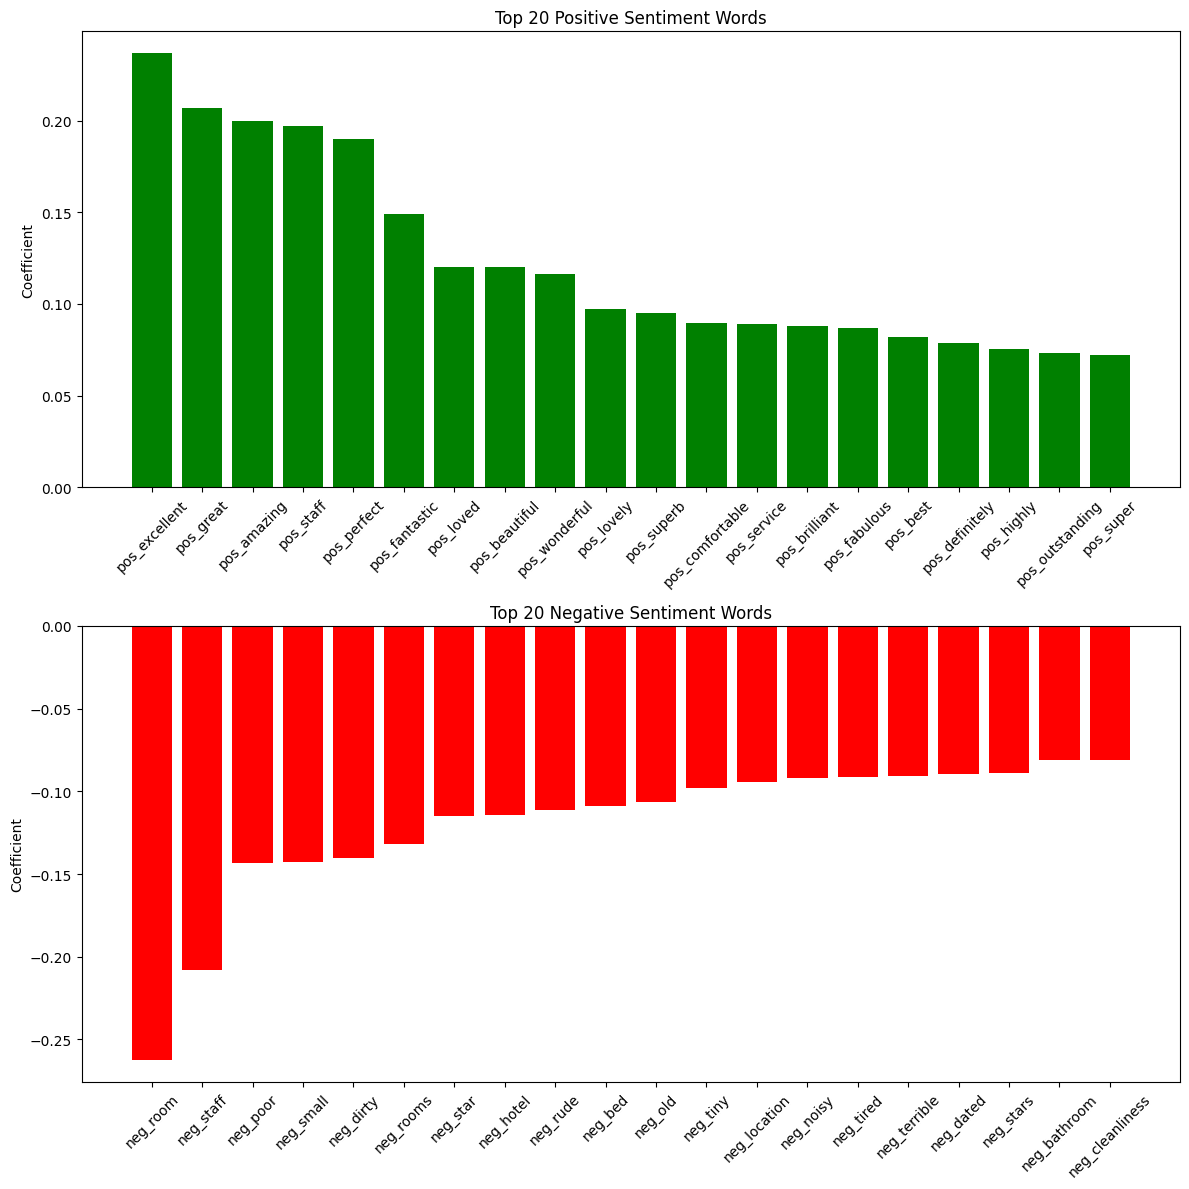

In [56]:
# Filtering for 'neg_' features
neg_features_df = coef_df[coef_df['feature'].str.startswith('neg_')]
# Filtering for 'pos_' features
pos_features_df = coef_df[coef_df['feature'].str.startswith('pos_')]

# Splitting into positive and negative sentiment
positive_sentiment_words = pos_features_df[pos_features_df['coefficient'] > 0].nlargest(20, 'coefficient')
negative_sentiment_words = neg_features_df[neg_features_df['coefficient'] < 0].nsmallest(20, 'coefficient')


# Visualization 
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

axes[0].bar(positive_sentiment_words['feature'], positive_sentiment_words['coefficient'], color='green')
axes[0].set_title('Top 20 Positive Sentiment Words')
axes[0].set_ylabel('Coefficient')
axes[0].tick_params(axis='x', rotation=45)


axes[1].bar(negative_sentiment_words['feature'], negative_sentiment_words['coefficient'], color='red')
axes[1].set_title('Top 20 Negative Sentiment Words')
axes[1].set_ylabel('Coefficient')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The graph illustrates the words that have the strongest correlations with Reviewer_Score across all reviews, based on the model's analysis. It effectively reveals which words tend to influence the review score positively or negatively.

Key findings:

#### Positive Correlations

Words with positive coefficients, indicating a tendency to increase review scores, include:

- "Excellent"
- "Great"
- "Amazing"
- "Perfect"

These words are typically associated with positive experiences, so their correlation with higher review scores aligns with expectations.

#### Negative Correlations

Words with negative coefficients, suggesting a tendency to decrease review scores, include:

- "Dirty"
- "Rude"
- "Noisy"

These words generally indicate negative experiences, explaining their association with lower review scores.

This analysis provides valuable insights into the language used in reviews and its relationship with overall satisfaction scores. It confirms the intuitive understanding that positive descriptors correlate with higher scores, while negative descriptors correlate with lower scores.

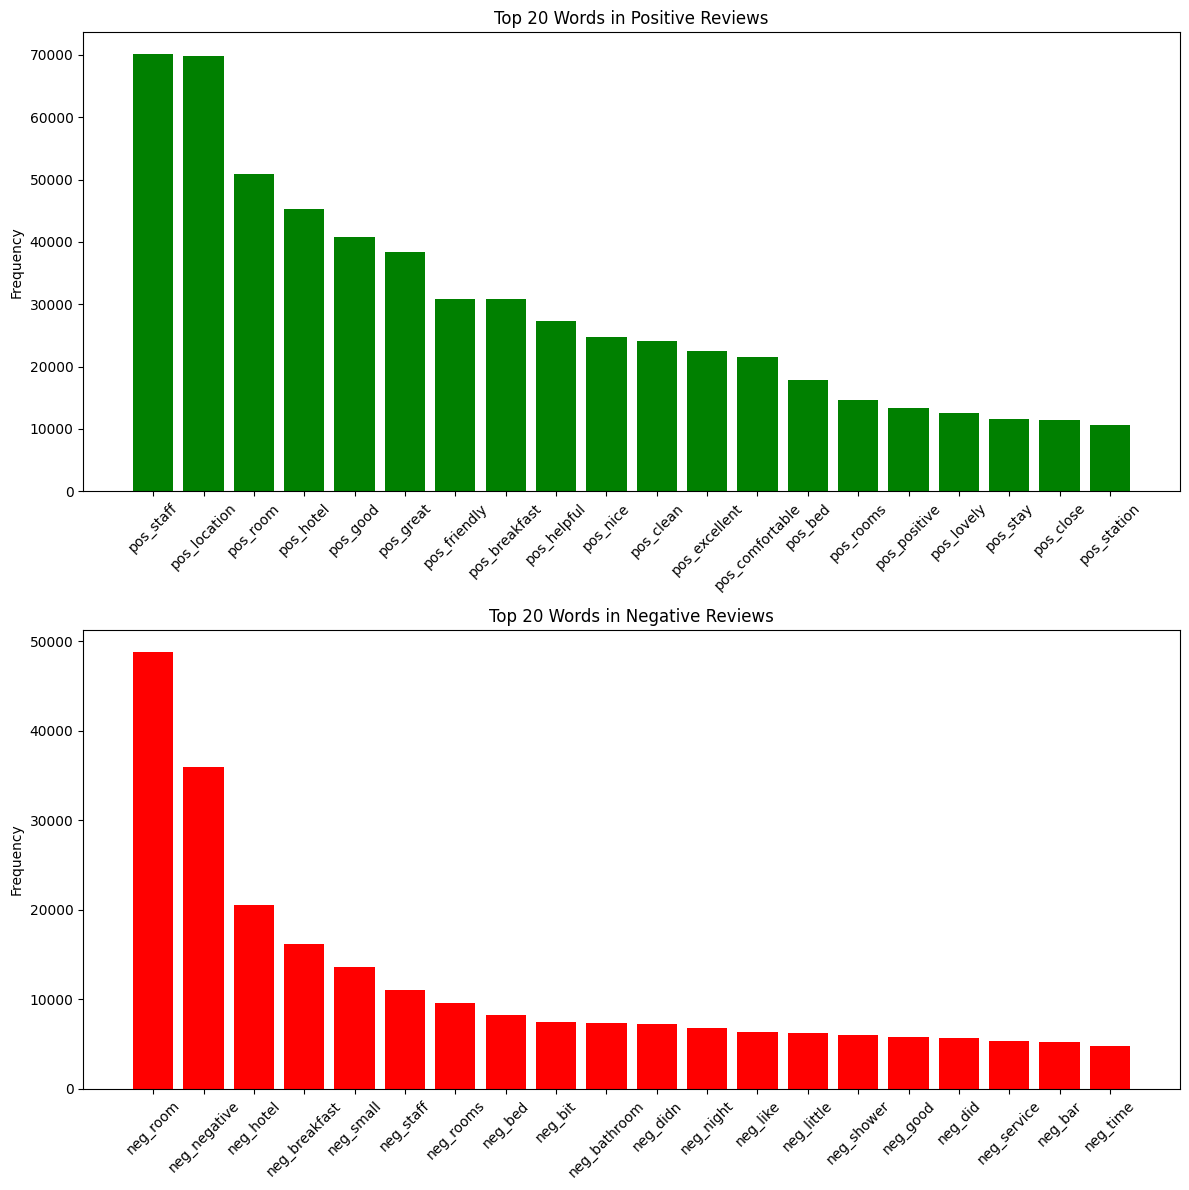

In [57]:
# 1. Separate into Positive and Negative Reviews DataFrames WITHIN X_TRAIN
# Creating a temporary DataFrame that joins X_train and y_train for filtering
temp_df = X_train.copy()
temp_df['Reviewer_Score'] = y_train  # Add Reviewer_Score back in

positive_reviews_df = temp_df[temp_df['Reviewer_Score'] == 1].drop('Reviewer_Score', axis=1)
negative_reviews_df = temp_df[temp_df['Reviewer_Score'] == 0].drop('Reviewer_Score', axis=1)


# 2. Extract Word Counts for Positive and Negative Reviews
# Function to extract word counts, handling both 'neg_' and 'pos_' prefixes
def extract_word_counts(df, prefix):
    word_counts = {}
    for col in df.columns:
        if col.startswith(prefix):
            word = col  # The entire column name is the word
            word_counts[word] = df[col].sum() # Sum the column to get total count
    return word_counts

positive_word_counts = extract_word_counts(positive_reviews_df, 'pos_')
negative_word_counts = extract_word_counts(negative_reviews_df, 'neg_')

# 3. Find the Top 20 Words
def get_top_n_words(word_counts, n=20):
    """Returns the top n words and their counts from a dictionary of word counts."""
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:n]

top_20_positive_words = get_top_n_words(positive_word_counts)
top_20_negative_words = get_top_n_words(negative_word_counts)

# 4. Prepare data for plotting
positive_words = [word for word, count in top_20_positive_words]
positive_counts = [count for word, count in top_20_positive_words]

negative_words = [word for word, count in top_20_negative_words]
negative_counts = [count for word, count in top_20_negative_words]

# 5. Create the Plots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Positive Reviews
axes[0].bar(positive_words, positive_counts, color='green')
axes[0].set_title('Top 20 Words in Positive Reviews')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Negative Reviews
axes[1].bar(negative_words, negative_counts, color='red')
axes[1].set_title('Top 20 Words in Negative Reviews')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Summary of the word frequency analysis from the graph, focusing on the most important insights:

**Positive Review Insights:**

*   **Key Positives:** Staff ("pos\_staff"), location ("pos\_location"), room ("pos\_room"), and hotel ("pos\_hotel") are the most frequent positive mentions.
*   **Service and Amenities:** Positive sentiment is associated with "pos\_good", "pos\_great", "pos\_friendly", "pos\_helpful", "pos\_nice", "pos\_clean", "pos\_excellent", "pos\_comfortable", "pos\_bed", "pos\_breakfast".

**Negative Review Insights:**

*   **Room Issues:** "neg\_room" is the most frequent negative term, indicating room quality is a major concern.
*   **General Negativity:** "neg\_negative" and "neg\_hotel" suggest overall dissatisfaction.
*   **Specific Problems:** "neg\_breakfast", "neg\_small", "neg\_staff", "neg\_rooms", "neg\_bed", "neg\_bit" point to problems with breakfast, room size, staff, and bedding.

**Limitations:**

An initial review of the positive review words (**'positive', 'fast', 'fine', 'nights', 'towel', 'need'**) reveals a lack of clear, direct relationships to positive sentiment. These terms appear rather generic and do not immediately convey strong positive associations. Similarly, while the top negative review words (**'fault', 'slow', 'loud', 'doesn't'**) are somewhat more intuitive, the presence of vague terms such as **'ask', 'turn', 'think'** raises concerns about their true predictive power for negative or positive sentiment.

Now let's iterate on this mode by removing any features with multicolinearity and also potentially removing the Logitute and Latitue features to see if this makes the accruary of out model better or worse. This will also help us understand the importance of these features in our model.

<a id="two"></a>
### Logistic Regression Iteration

Our initial analysis, including a **correlation matrix**, revealed several instances of **multicollinearity** among our features. Multicollinearity occurs when independent variables in a model are correlated, leading to **unstable coefficient estimates** and making it difficult to determine the **true effect of each individual predictor**. To mitigate these issues, we're conducting a new model iteration with specific features removed.

Specifically, we are addressing two key sources of multicollinearity:

1.  **Location Attributes:** Recognizing that **longitude and latitude** might be inadvertently capturing **city-specific effects** (e.g., the "London effect," where unmodeled characteristics of London influence review scores), we've removed these variables to reduce **misattribution**. This allows the model to focus on other drivers of review scores independent of geographic location.

2.  **Review Metrics:**  "**Additional\_Number\_of\_Scoring**" exhibits high multicollinearity with "**Total\_Number\_of\_Reviews**," indicating they provide largely redundant information. Similarly, "**Days\_Since\_Review**" is highly correlated with "**Year**," potentially confounding the time-based effects. By removing **"Additional\_Number\_of\_Scoring" and "Days\_Since\_Review,"** we aim to isolate the individual contributions of **"Total_Number_of_Reviews" and "Year"** on the target variable.

In addition to this feature-selection approach, we will also be training a separate model that utilizes **Principal Component Analysis (PCA)** for **dimensionality reduction**. This allows us to compare its performance against the feature selected model as it keeps all features. PCA aims to transform the original features into a set of uncorrelated principal components, capturing the most important information in a lower-dimensional space. By comparing models using both feature selection and dimensionality reduction techniques, we aim to gain a comprehensive understanding of the key factors influencing hotel review scores.

By removing these features, we seek to create a **more robust and interpretable model**, reducing the risk of **spurious relationships** and improving the **accuracy of our predictions**. This is the main goal and we will compare all models at the end.

In [58]:
# removing features with high multicoliarity from the train and test 
X_train_model1 = X_train.drop(['Latitude', 'Longitude', 'Additional_Number_of_Scoring', 'Days_Since_Review'], axis=1)
X_test_model1 = X_test.drop(['Latitude', 'Longitude', 'Additional_Number_of_Scoring', 'Days_Since_Review'], axis=1)

In [59]:
# using an ML pipeline to build a log reg model where we mannually removed features with multicolinearity 
estimators = [
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=40, max_iter=1000, C=0.5))]

pipe = Pipeline(estimators)
    
pipe.fit(X_train_model1, y_train)

print(f'Test score of model without milticolinear features: {pipe.score(X_test_model1, y_test)}')

Test score of model without milticolinear features: 0.7895380434782608


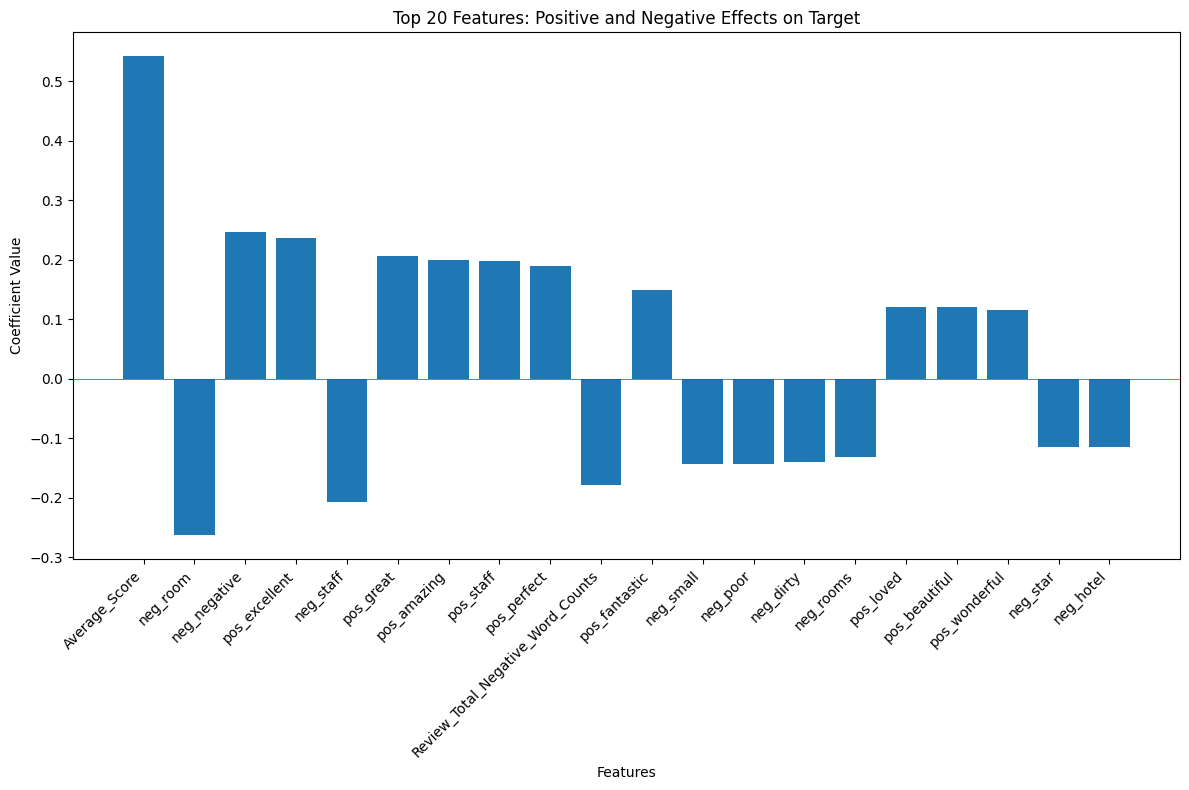

In [60]:
# 1. Extract Coefficients and Feature Names
logistic_model = pipe.named_steps['logistic']  # Access the LogisticRegression estimator
coefficients = logistic_model.coef_[0]  # Extract the coefficients
feature_names = X_train_model1.columns  # Get feature names from X_train

# 2. Create a DataFrame for Easier Handling
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# 3. Sort by Absolute Coefficient Value (Magnitude)
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

# 4. Select Top N Features
top_n = 20  # Number of top features to display
top_features = feature_importance.head(top_n)

# 5. Create the Plot
plt.figure(figsize=(12, 8))
plt.bar(top_features['feature'], top_features['coefficient'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title(f'Top {top_n} Features: Positive and Negative Effects on Target')
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)  # Add a horizontal line at y=0
plt.tight_layout()
plt.show()

The analysis of feature contributions reveals a key finding: the top features influencing the target (whether positively or negatively) are remarkably similar between the model trained with all features and the one trained with multicollinear features removed. Specifically, the feature importance plot for both models show the same primary features contributing to the model. This suggests that, despite our efforts to address multicollinearity, the removal of these features has not substantially altered the fundamental drivers of the model's predictions. Consequently, the test accuracy has remained relatively unchanged. This could indicate that the multicollinear features, while statistically problematic, were not masking or suppressing the influence of other, more informative variables, or that the chosen method for selecting important variables is not sensitive enough to detect a change.

In [61]:
# using an ML pipeline to build a log reg model where we use PCA to reduce dimensonality 
estimators2 = [
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),
    ('logistic', LogisticRegression(random_state=40, max_iter=1000, C=0.5)) 
]

pipe2 = Pipeline(estimators2)
    
pipe2.fit(X_train, y_train)

print(f'Test score for model with PCA for dim reduction: {pipe2.score(X_test, y_test)}')

Test score for model with PCA for dim reduction: 0.7877135093167702


In [62]:
# comparing test scores for all the models 
print(f"Test score for model with all the features: {logreg.score(X_test_scaled, y_test)}")
print(f'Test score of model without milticolinear features: {pipe.score(X_test_model1, y_test)}')
print(f'Test score for model with PCA for dim reduction: {pipe2.score(X_test, y_test)}')

Test score for model with all the features: 0.7894215838509316
Test score of model without milticolinear features: 0.7895380434782608
Test score for model with PCA for dim reduction: 0.7877135093167702


After evaluating multiple models, the one trained on the dataset *without* features exhibiting **multicollinearity** achieved a **slightly improved test accuracy** (78.95%) compared to the model using **all features** (78.94%). A model incorporating **PCA for dimensionality reduction** yielded similar results (78.77%). While removing multicollinearity shows a minor improvement, the relatively small differences in test accuracy across all models suggest that the issue may not be a significant driver of model performance in this particular case. The consistently moderate accuracy levels around 78% for all models indicate that other factors— such as **data limitations**, **feature engineering choices**, or the **inherent complexity of accurately predicting review scores**—may be limiting overall performance.

<a id="tree"></a>
## Decission Trees
[Back to Table of Contents](#table-of-content)

Given the limited success of previous models, let's explore Decision Trees, a powerful class of machine learning algorithms that offer a different approach to prediction.

**Decision Trees: Overview**

Decision Trees work by recursively partitioning the feature space into regions, creating a tree-like structure:

1. **Feature Selection:** Choose the best feature to split the data, based on metrics like Gini impurity or information gain.
2. **Splitting:** Use the selected feature to divide the data into subsets.
3. **Recursion:** Repeat steps 1 and 2 for each subset, creating a tree structure.
4. **Prediction:** Traverse the tree from root to leaf to make predictions.

**Benefits of Decision Trees**

- **Interpretability:** Easy to understand how predictions are made.
- **Non-Linearity:** Can capture complex relationships between features and target.
- **Feature Importance:** Provides insight into which features are most influential.
- **No Scaling Required:** Works with raw feature values.


In [63]:
print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"y_train has {y_train.shape[0]} rows")
print(f"y_test has {y_test.shape[0]} rows")

X_train has 412159 rows and 1026 columns
X_test has 103040 rows and 1026 columns
y_train has 412159 rows
y_test has 103040 rows


Let's use an ML pipeline as this will make our work easier, faster and reduce the potential for errors. We wil be using GridsearchCV, which is used to define a pipeline, and then exhaustively test all possible combinations of hyperparameters to see which will give us the best score on a given metrics.

In [64]:
# Estimators
estimators = [('normalise', StandardScaler()),
              ('reduce_dim', PCA(random_state=42)),
              ('model', DecisionTreeClassifier(random_state=42))]

# Pipeline
pipe3 = Pipeline(estimators)

# Parameter grid for grid search
param_grid = {'model': [DecisionTreeClassifier(random_state=42)],
              'normalise': [None],
              'model__max_depth': [2, 5, 10, 15],
              'model__min_samples_leaf': [1, 5, 10, 15],
              'reduce_dim__n_components': [20],
              'model__criterion': ['gini', 'entropy']
}

# Grid Search
grid_search = GridSearchCV(
    pipe3, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1
)

# Setting a random seed for reproducibility
random.seed(42)

# Getting the total number of samples
n_samples = len(X_train)

# Generating a list of random indices
random_indices = random.sample(range(n_samples), 30000)

# Using these indices to create random subsets
X_train_small = X_train.iloc[random_indices]
y_train_small = y_train.iloc[random_indices]

# Fitting the grid search
fitted_grid_search = grid_search.fit(X_train_small, y_train_small)

# Best parameters and score
print("Best parameters:", fitted_grid_search.best_params_)
print("Best cross-validation score:", fitted_grid_search.best_score_)

Best parameters: {'model': DecisionTreeClassifier(random_state=42), 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 10, 'normalise': None, 'reduce_dim__n_components': 20}
Best cross-validation score: 0.7285999999999999


#### Decision Tree Model Optimization with GridSearchCV

##### Initial Setup

We began by defining our estimator, which serves as a placeholder and can be used to evaluate multiple models simultaneously. In this case, we focused on optimizing parameters for a single model: **Decision Trees**.

##### Pipeline and Parameter Grid

We created a pipeline and defined a parameter grid for evaluation:

- **max_depth**: Controls the maximum depth of the tree to prevent overfitting.
- **min_samples_leaf**: Sets the minimum number of samples required at a leaf node.
- **criterion**: Determines the function used to measure the quality of a split (e.g., "gini" or "entropy").
- **random_state**: Ensures reproducibility of results.
- **normalize**: Set to None as decision trees do not require scaling.
- **PCA**: Used to reduce dimensionality of our dataset.

##### GridSearchCV on a Subset

Due to the large size of our training dataset (412,159 rows and 1,026 columns), we used a random subset for GridSearchCV to reduce computational expense and time as it was taking really long to run with the whole train set. Despite using a subset, the GridSearchCV still performed:

- Total combinations: 32 (1 * 1 * 4 * 4 * 1 * 2)
- 5-fold cross-validation
- Total model fits: 160 (32 * 5)

##### Optimal Hyperparameters

After fitting the grid search on the data subset, we found the ideal hyperparameters:

- 'model__criterion': 'entropy'
- 'model__max_depth': 10
- 'model__min_samples_leaf': 10

The best accuracy score (best_score_) for the subset was 0.7285999999999999.

##### Next Steps

Now that we have identified the best hyperparameters, our next step is to train the optimized model on the entire training set. This is crucial because we previously only used a subset for hyperparameter tuning. We will then evaluate the model's performance on both the full training set and the test set to get a comprehensive understanding of its accuracy and generalization capabilities.

In [65]:
# Access the best estimator
best_model = fitted_grid_search.best_estimator_

# Refit the best model on the entire training data
best_model.fit(X_train, y_train)

# Now we can evaluate on the entire training set
train_score = best_model.score(X_train, y_train)
print("Score on entire training set:", train_score)

# And on a separate test set (if available)
test_score = best_model.score(X_test, y_test)
print("Score on test set:", test_score)

Score on entire training set: 0.7595636635376153
Score on test set: 0.7498835403726708


#### Evaluating Decision Tree Performance

After training our optimized Decision Tree model on the full dataset, we observed the following results:

1. **Performance on Full Training Set**: 
   - The model performed slightly better on the complete training set.
   - This improvement was expected due to the larger amount of data available for learning.

2. **Test Set Performance**:
   - Accuracy on the test set: 0.7498835403726708
   - This represents a slight decrease compared to the training set performance.

3. **Comparison with Logistic Regression**:
   - The Decision Tree model's accuracy is lower than our previously implemented Logistic Regression models.

#### Possible Reasons for Lower Performance

The discrepancy in performance between the Decision Tree and Logistic Regression models could be attributed to several factors:

1. **Nature of the Data**:
   - Logistic Regression might be better suited to the underlying patterns in our dataset.
   - The decision boundaries in our feature space might be more linear, favoring Logistic Regression.

2. **Overfitting**:
   - Despite our efforts to optimize hyperparameters, the Decision Tree might still be overfitting to the training data.
   - This could explain the drop in performance on the test set.

3. **Feature Interactions**:
   - Logistic Regression might be capturing important feature interactions that the Decision Tree is missing.

5. **Noise Sensitivity**:
   - Decision Trees can be sensitive to noise in the data, which might be affecting its performance.

6. **Limited Depth**:
   - Our optimal max_depth of 5 might be too restrictive for capturing complex patterns in the data.

To improve the Decision Tree's performance, we could consider:
- Ensemble methods like Random Forests or Gradient Boosting
- Further feature engineering or selection
- Exploring other algorithms that might be better suited to our problem

<a id="eval"></a>
## Model Evaluation
[Back to Table of Contents](#table-of-content)

#### Comprehensive Evaluation of Logistic Regression Model

While our logistic regression model demonstrated higher accuracy compared to the decision tree, it's crucial to conduct a more thorough evaluation. Accuracy alone can be misleading, especially with imbalanced datasets or when certain types of errors are more costly than others.

##### Beyond Accuracy: A Deeper Analysis

We'll now take a closer look at our logistic regression model (the best performing version without multicollinear features) to assess its true effectiveness in predicting outcomes. This evaluation will involve several key metrics and visualizations:

1. **Confusion Matrix**: To visualize true positives, false positives, true negatives, and false negatives.
2. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
3. **Recall**: The ratio of correctly predicted positive observations to all actual positives.
4. **F1 Score**: The harmonic mean of precision and recall, providing a single score that balances both metrics.
5. **ROC Curve and AUC**: To evaluate the model's ability to distinguish between classes.
6. **Precision-Recall Curve**: Especially useful if we have class imbalance.

By examining these metrics, we can gain a more comprehensive understanding of our model's performance, including:
- How well it identifies positive cases
- Its ability to avoid false positives
- Its overall balance between precision and recall

This in-depth analysis will help us determine if the logistic regression model is truly superior for our specific problem and dataset, or if we need to reconsider our approach.

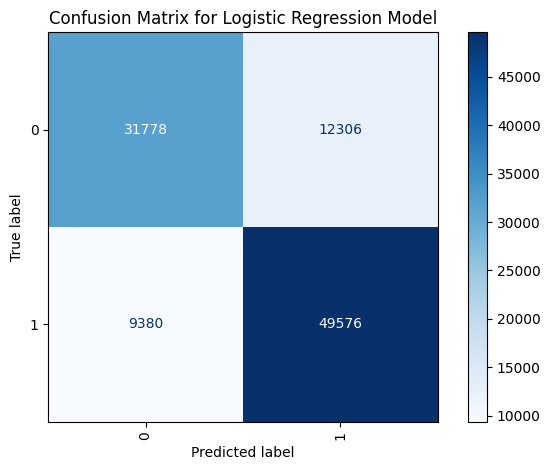

In [74]:
# plotting the confusion matrix
cm = confusion_matrix(y_test, pipe.predict(X_test_model1))

# Creating a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipe.named_steps['logistic'].classes_)

# Plotting the confusion matrix with desired formatting
disp.plot(cmap='Blues', xticks_rotation='vertical', values_format='.0f')

plt.title('Confusion Matrix for Logistic Regression Model')
plt.tight_layout()
plt.show()

In [75]:
# Accessing individual values from the matrix:
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 31778
False Positives: 12306
False Negatives: 9380
True Positives: 49576


#### Interpretation of Confusion Matrix Results

The confusion matrix provides valuable insights into our model's classification performance. We can see the following:

- **True Positive Rate (Sensitivity or Recall):**
  - The model correctly identified 84% of the actual positive cases (class 1). In other words, it has a sensitivity of 84%.
- **True Negative Rate (Specificity):**
  - The model correctly identified 72% of the actual negative cases (class 0). This indicates a specificity of 72%.
- **False Positive Rate (Type I Error):**
  - The model incorrectly classified 28% of the actual negative cases as positive. This is the percentage of times the model raised a false alarm.
- **False Negative Rate (Type II Error):**
  - The model incorrectly classified 16% of the actual positive cases as negative. This indicates the percentage of positives that the model missed.

In summary:
- Our model accurately classified positive instances 84% of the time.
- Our model accurately classified negative instances 72% of the time.
- The model incorrectly identified a negative case as positive 28% of the time.
- The model incorrectly identified a positive case as negative 16% of the time.

### Precsion vs. Recall 
### Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all the instances predicted as positive, how many were actually positive?"

- Formula: Precision = TP / (TP + FP)

**Calculation**:
Precision = 0.84 / (0.84 + 0.28) = 0.84 / 1.12 = 0.75

**Interpretation**:
The precision is 0.75 (or 75%). This means that when the model predicts an instance as positive, it is correct 75% of the time.

### Recall (Sensitivity or True Positive Rate) 
Recall is the ratio of correctly predicted positive observations to all actual positives. It answers the question: "Of all the actual positive instances, how many were correctly predicted?"

- Formula: Recall = TP / (TP + FN)

**Calculation**:
Recall = 0.84 / (0.84 + 0.16) = 0.84 / 1.0 = 0.84

**Interpretation**:
The recall is 0.84 (or 84%). This means that the model correctly identified 84% of all actual positive instances

Now let's look at some other metrics such as the f1 scores

In [77]:
# 1. Making predictions using your trained model
y_pred = pipe.predict(X_test_model1)
y_pred_proba = pipe.predict_proba(X_test_model1)[:, 1]

# 2. Calculating the F1 score
f1 = f1_score(y_test, y_pred)

# 3. Printing the F1 score
print(f"F1 Score: {f1}")

F1 Score: 0.8205365861732237


The F1 score is a single metric that balances precision and recall, providing a measure of a model's accuracy, especially useful when dealing with uneven class distributions. 

An F1 score of 0.82 is generally considered a good score. It means our model has a good balance between precision and recall. Here's a more detailed interpretation:

- **Good Performance**: 0.82 indicates that the model is performing well in terms of both correctly identifying positive cases (high recall) and minimizing false positives (high precision). It's a solid score suggesting a useful and reliable model.

- **Balanced Precision and Recall**: The F1 score being 0.82 suggests that precision and recall are reasonably balanced. If the F1 score were significantly lower than both precision and recall, it would indicate a large discrepancy between them (e.g., very high recall but low precision, or vice versa).

In [68]:
# priting the clasification report which gives us all the data 
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.77      0.72      0.75     44084
           1       0.80      0.84      0.82     58956

    accuracy                           0.79    103040
   macro avg       0.79      0.78      0.78    103040
weighted avg       0.79      0.79      0.79    103040



The classification report provides a summary of your model's performance, broken down by each class (0 and 1 in your case). Here's what each column means:

- **Precision**: For each class, it's the ratio of true positives to all predicted positives. It measures how many of the instances predicted as that class were actually correct.

    - Precision for class 0: 0.77, meaning 77% of instances predicted as class 0 were correct.
    - Precision for class 1: 0.80, indicating 80% of instances predicted as class 1 were correct.

- **Recall**: For each class, it's the ratio of true positives to all actual positives. It measures how many of the actual instances of that class were correctly identified.

    - Recall for class 0: 0.72, meaning the model correctly identified 72% of all actual class 0 instances.
    - Recall for class 1: 0.84, indicating the model correctly identified 84% of all actual class 1 instances.

- **F1-score**: The harmonic mean of precision and recall for each class.
    - F1-score for class 0: 0.75
    - F1-score for class 1: 0.82

- **Support**: The number of actual occurrences of each class in the test set. This is important context – it tells you how many instances of each class the model was evaluated on.
    - Support for class 0: 44,084 instances
    - Support for class 1: 58,956 instances
    - Total instances: 103,040

- **Accuracy**: Overall accuracy of the model across all classes is 0.79 or 79%.

- **Macro Avg**: The unweighted average of precision, recall, and F1-score across all classes.
    - Macro Avg Precision: 0.79
    - Macro Avg Recall: 0.78
    - Macro Avg F1-score: 0.78

- **Weighted Avg**: The average of precision, recall, and F1-score weighted by the support (number of true instances) for each class. This accounts for class imbalance.
    - Weighted Avg Precision: 0.79
    - Weighted Avg Recall: 0.79
    - Weighted Avg F1-score: 0.79

The model performs slightly better on class 1, with higher precision, recall, and F1-score. There's also a class imbalance, with more instances of class 1 (58,956) than class 0 (44,084) in the dataset.

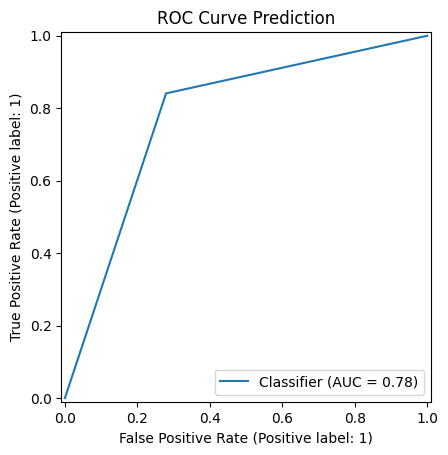

In [69]:
# ploting our ROC AUC curve 
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.title("ROC Curve Prediction")
plt.show()

#### ROC AUC curve imterpretention: 

*   **ROC Curve:** The curve plots the True Positive Rate (TPR, or recall) against the False Positive Rate (FPR) at various threshold settings. Ideally, we want a curve that hugs the top-left corner, indicating a high TPR and a low FPR.
*   **AUC (Area Under the Curve) = 0.78:** This score represents the area under the ROC curve. It quantifies the overall ability of our model to distinguish between positive (positive review) and negative (negative review) instances.

**Interpretation:**

*   **Good Discrimination:** An AUC of 0.78 suggests that your model has a reasonably good ability to discriminate between positive and negative hotel reviews. It's better than random guessing (AUC = 0.5), but there's still room for improvement as it's not closer to a perfect score of 1.0.
*   **Probability Interpretation:** You can interpret the AUC of 0.78 as follows: if you randomly select one positive review and one negative review, there is a 78% chance that your model will assign a higher probability of being positive to the actual positive review.
*   **Trade-off Consideration:** The ROC curve visually summarizes the trade-off between the true positive rate and the false positive rate. This means as you adjust the threshold for classifying a review as positive, you are balancing catching more positive reviews (higher TPR) with the risk of incorrectly classifying negative reviews as positive (higher FPR).

In summary, the ROC AUC of 0.78 indicates a reasonable ability to distinguish between positive and negative hotel reviews, but since we have a class imbalanced (more positive than negative reviews), let's also examining the PR curve which will give us a better idea of how well the model does on the minority class.

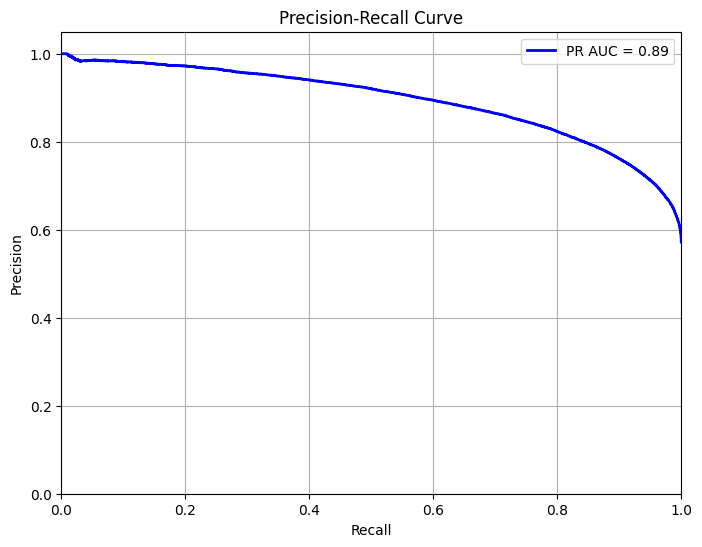

In [81]:
# Getting predicted probabilities for the positive class
y_prob = pipe.predict_proba(X_test_model1)[:, 1]

# Calculating precision and recall values for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculating the area under the PR curve
pr_auc = auc(recall, precision)

# Plotting the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

A PR AUC of 0.89 is considered very good. It indicates that your model is performing well in terms of both precision and recall, particularly for the positive class. It suggests a strong ability to correctly identify positive instances while minimizing false positives.

**Detailed Breakdown:**

*   **Area Under the Curve:** The PR AUC represents the area under the Precision-Recall curve. This curve plots precision against recall at different threshold settings. A higher PR AUC indicates that the model maintains high precision and recall across various threshold values.
*   **Excellent Performance on the Positive Class:** An AUC of 0.89 is close to the maximum possible score of 1.0. This means your model is achieving a good balance between precision and recall. It's correctly identifying a large proportion of the positive instances (high recall) and also limiting the number of negative instances it incorrectly classifies as positive (high precision).

**Practical Implications for Hotel Review Dataset:**

In the context of your hotel review dataset where you're predicting reviewer scores (1 = positive, 0 = negative), a PR AUC of 0.89 signifies:

*   The model is effectively identifying positive hotel reviews. It's correctly classifying a large proportion of genuinely positive reviews as positive.
*   The model is relatively accurate in predicting positive reviews. When the model predicts a review as positive, it is correct a high percentage of the time.

<a id="cinclusion"></a>
## Conclusion
[Back to Table of Contents](#table-of-content)

### **Conclusion of the Hotel Reviews NLP Project**

The project aimed to predict hotel review scores (positive vs. negative) using a dataset containing features such as average review scores, positive and negative reviews, hotel locations, and reviewer demographics. Through data preprocessing, feature engineering, and model evaluation, we gained valuable insights into the factors influencing review scores and built a robust predictive model.

#### **Key Steps and Findings**
1. **Data Exploration and Preprocessing**:
   - The dataset exhibited slight class imbalance, with more positive reviews than negative ones.
   - Reviewer nationality skewed heavily toward the UK and "Other," while average scores were skewed toward higher values.
   - Duplicate rows were removed, and basic exploratory data analysis revealed potential multicollinearity in features like longitude, latitude, and city-specific attributes.

2. **Feature Engineering**:
   - NLP techniques were applied to tokenize positive and negative reviews separately, excluding stop words to focus on meaningful tokens.
   - CountVectorizer was used to convert tokens into numerical features, limited to the top 500 most frequent tokens for dimensionality reduction.
   - Prefixes (`pos_` for positive words and `neg_` for negative words) were added to distinguish sentiment effects in the dataset.

3. **Baseline Model**:
   - The initial logistic regression model achieved an accuracy of **0.7894**, with positive words generally boosting review scores and negative words lowering them.
   - Multicollinearity was identified in features such as longitude, latitude, and city-specific attributes.

4. **Improved Model**:
   - Removing multicollinear features (e.g., longitude, latitude, `Additional_Number_of_Scoring`, `Days_Since_Review`) slightly improved accuracy to **0.7895**.
   - PCA was tested for dimensionality reduction but did not significantly enhance performance.

5. **Alternative Models**:
   - A pipeline was used to test other machine learning models (e.g., decision trees) with hyperparameter tuning.
   - The logistic regression model with reduced multicollinear features remained the best-performing model overall.

6. **Model Evaluation**:
   - The best model achieved an F1-score of **0.8205**, indicating strong balance between precision and recall.
   - ROC AUC was **0.78**, showing good overall discrimination between positive and negative reviews.
   - PR AUC was **0.89**, highlighting excellent performance in identifying positive reviews despite class imbalance.


#### **Insights**
- Positive sentiment words (e.g., "excellent," "amazing," "beautiful") strongly influenced higher review scores.
- Negative sentiment words (e.g., "dirty," "small") were associated with lower scores, aligning with expectations.
- Location-specific effects (longitude/latitude) introduced multicollinearity but were mitigated by feature removal.

#### **Final Thoughts**
This project successfully demonstrated the application of NLP techniques in predicting hotel review scores. While logistic regression performed well as the baseline model, removing multicollinear features improved interpretability without sacrificing accuracy. The evaluation metrics (F1-score: 0.82; ROC AUC: 0.78; PR AUC: 0.89) indicate that the model balances precision and recall effectively while handling class imbalance.

Future improvements could include exploring advanced NLP models like transformers or incorporating external data sources (e.g., city popularity metrics) to refine predictions further. Overall, this project provides a solid foundation for understanding sentiment-driven patterns in hotel reviews and leveraging them for predictive modeling tasks.